*This code used iminuit minimization to deconvolute NMR spectrum by fitting the spectrum to lorentzian peaks*

*Shiva Agarwal*

*April 7 2025*

In [7]:
import time
import csv
import numpy as np
import matplotlib . pyplot as plt
# everything in iminuit is done through the Minuit object , so we import it
from iminuit import Minuit # we also need a cost function to fit and import the LeastSquares function
from iminuit . cost import LeastSquares 
import iminuit
from jacobi import propagate
print ( " iminuit version : " , iminuit . __version__ ) # display iminuit version

 iminuit version :  2.17.0


In [8]:
def lorentz(x, gamma, x0, A): #define lorentz fnc for single peak
    return (A*gamma/(np.pi*((x - x0)**2) + gamma**2))

def lorentz_multi(x, gamma, center, split, A): #define fnc for three peaks
    return  lorentz(x, gamma, center + split, A)+ lorentz(x, gamma, center, A) +  lorentz(x, gamma, center - split, A) 

def lorentz_cluster(x, gamma, center_1, split_1, center_2, split_2, A, offset): #define fnc for cluster of six peaks 
    return lorentz_multi(x, gamma, center_1, split_1, A) + lorentz_multi(x, gamma, center_2, split_2, A) + offset

def lorentz_multi_singlet(x, gamma, center_1, center_2, center_3, A, offset): #define fnc for three individual peaks
     return lorentz(x, gamma, center_1, A) + lorentz(x, gamma, center_2, A) + lorentz(x, gamma, center_3, A) + offset

def lorentz_cluster_singlet(x, gamma, center_1,  center_2, center_3, center_4, center_5, center_6, A, offset): #define fnc for cluster of six individual peaks
        return lorentz(x, gamma, center_1, A) + lorentz(x, gamma, center_2, A)  + lorentz(x, gamma, center_3, A) + lorentz(x, gamma, center_4, A) + lorentz(x, gamma, center_5, A) + lorentz(x, gamma, center_6, A) + offset


**Import Data**

In [9]:
path = "/home/shiva/WMU/PhD/Scripts/phd_project/Python/NMR/Data_exp/" 
steps = 32768
x_start = 100.06
x_end = -106.0
steps_ppm = (x_end - x_start)/steps
x = np.arange(x_start, x_end, steps_ppm)

**Deconvolution of NMR spectra**

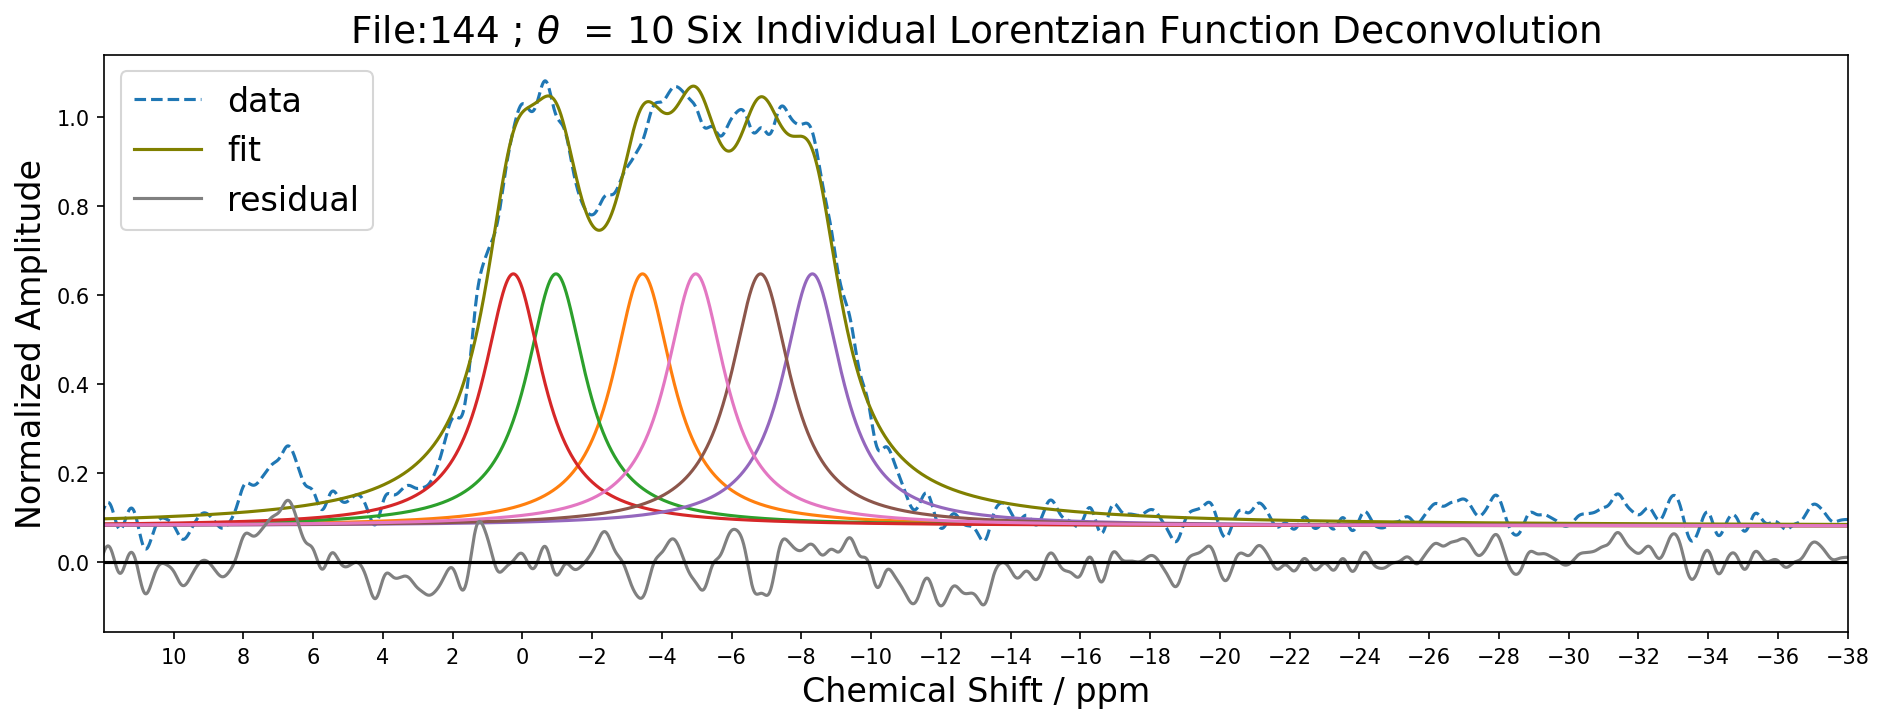

Results for data file SW_Shiva144.txt:
gamma = 1.8389900450333974
center_1 = -3.4398364302775497
center_2 = -0.9585411915781946
center_3 = 0.26412683511743673
center_4 = -8.31120778567839
center_5 = -6.824186482328486
center_6 = -4.966249593823692
A = 1.041007442030918
offset = 0.08170827702733728


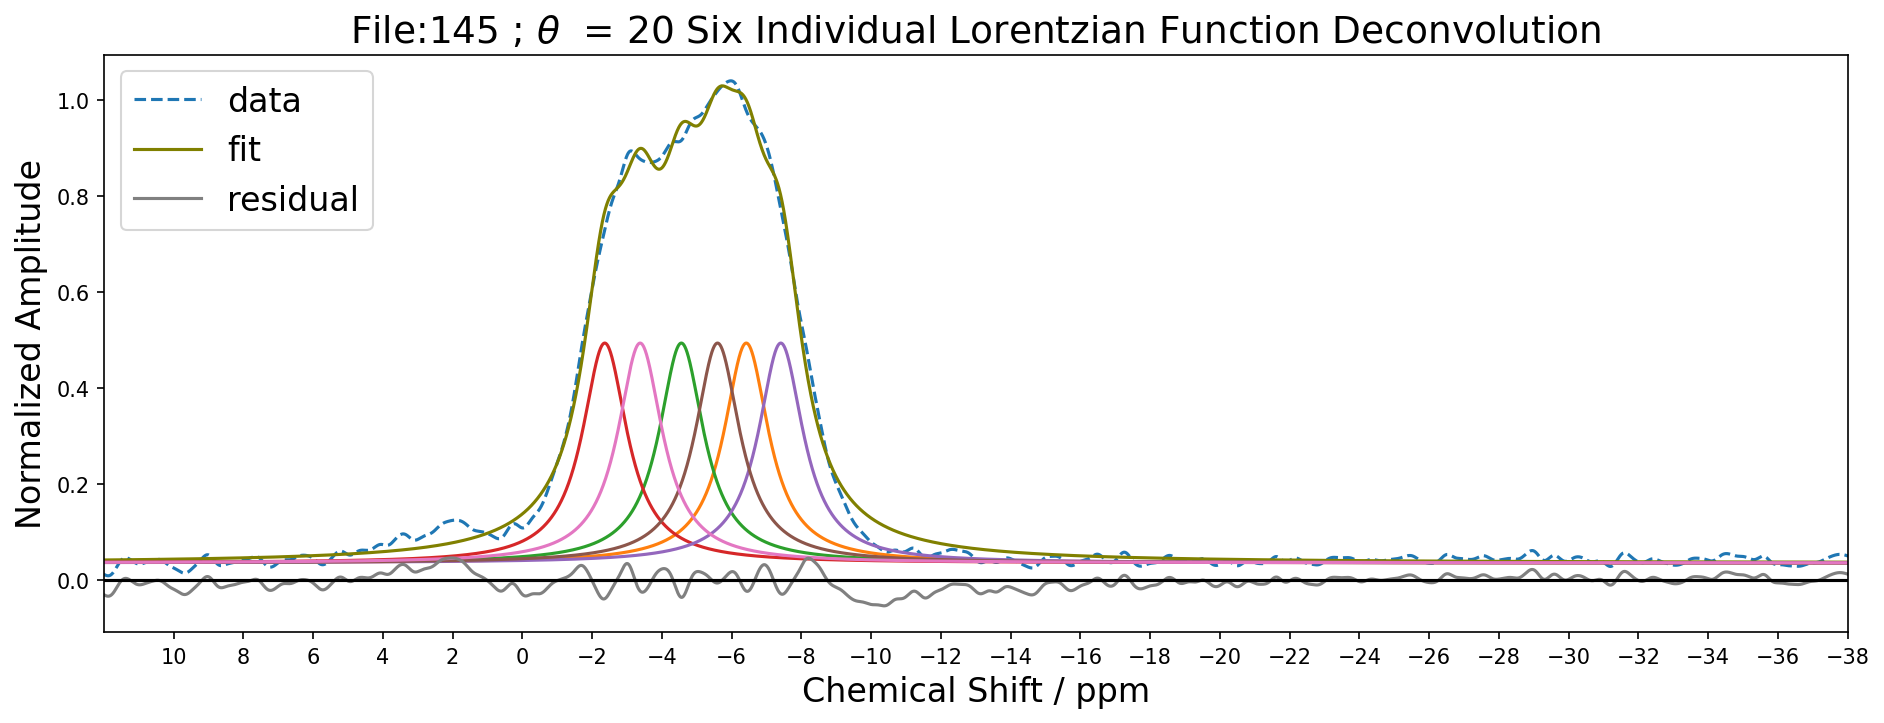

Results for data file SW_Shiva145.txt:
gamma = 1.3855589768633891
center_1 = -6.4155163361365855
center_2 = -4.553796839258544
center_3 = -2.357396281256869
center_4 = -7.404881954663511
center_5 = -5.591118723930517
center_6 = -3.3719254115353143
A = 0.6339534926413001
offset = 0.03639452590000893


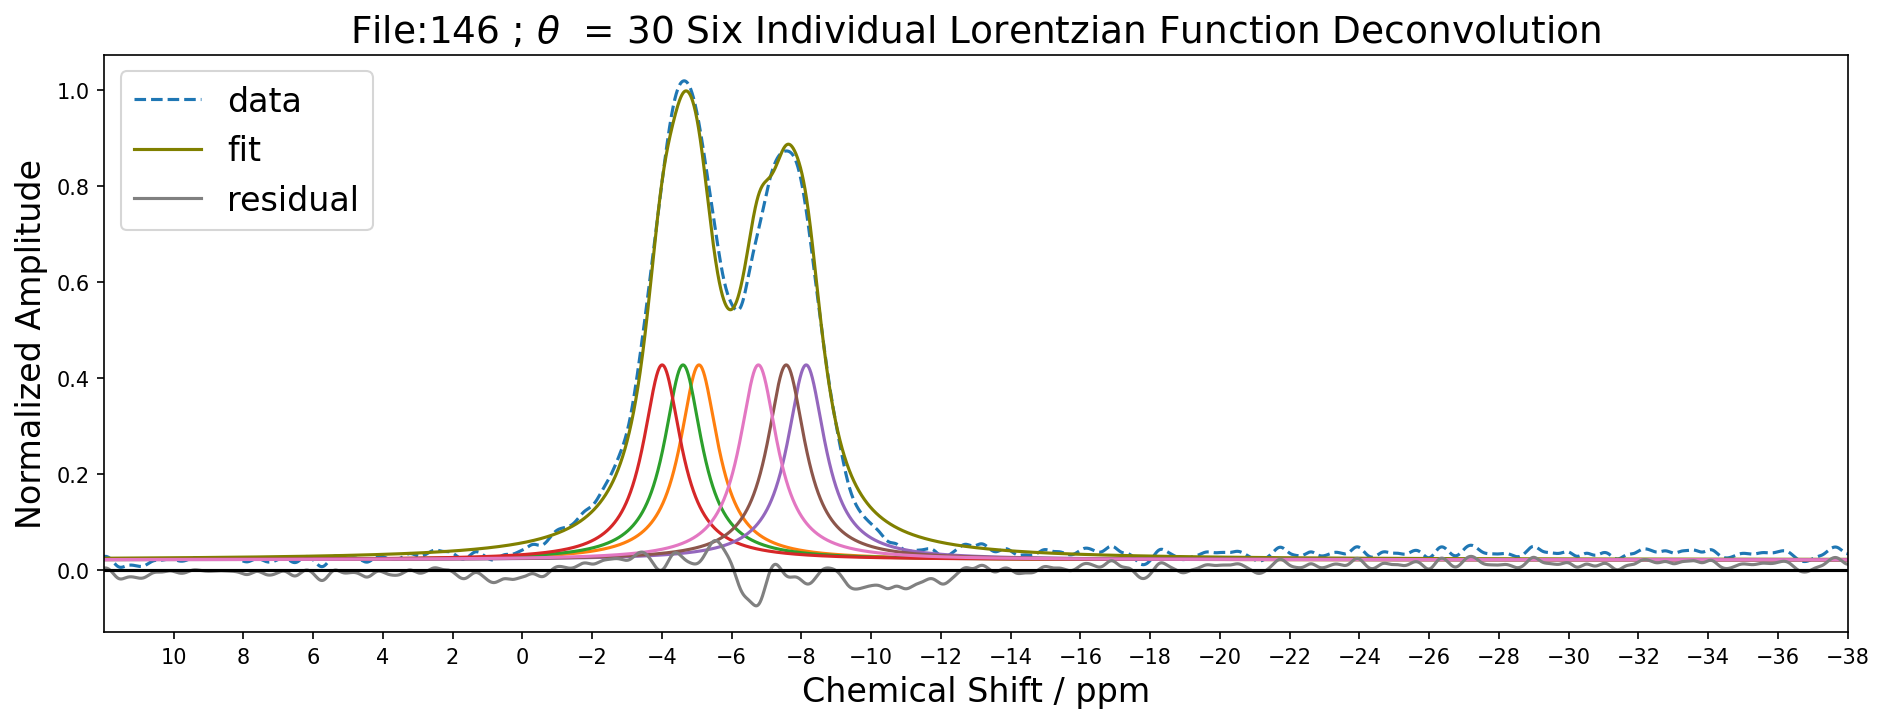

Results for data file SW_Shiva146.txt:
gamma = 1.1744355152563568
center_1 = -5.059812601622189
center_2 = -4.601465675024324
center_3 = -4.002922578600496
center_4 = -8.132725703512376
center_5 = -7.5599351728182285
center_6 = -6.7626794649436945
A = 0.47725754142013477
offset = 0.020779725162002185


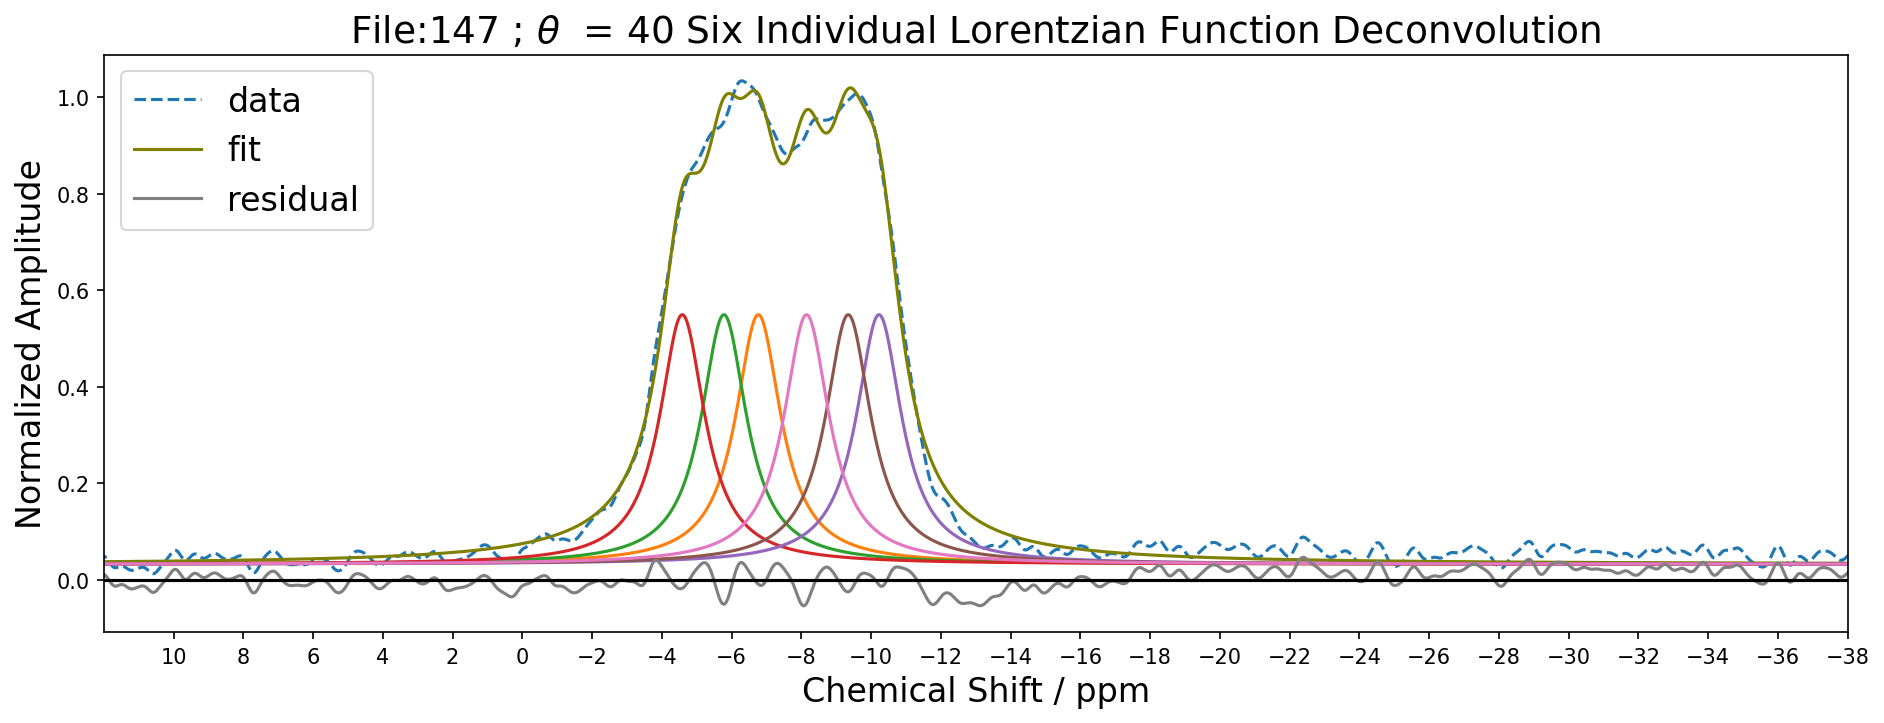

Results for data file SW_Shiva147.txt:
gamma = 1.3970493360357763
center_1 = -6.760646287156484
center_2 = -5.774421102373315
center_3 = -4.579981008443608
center_4 = -10.220740823701608
center_5 = -9.338425303581111
center_6 = -8.143800263104781
A = 0.7219008204689531
offset = 0.03280462024158941


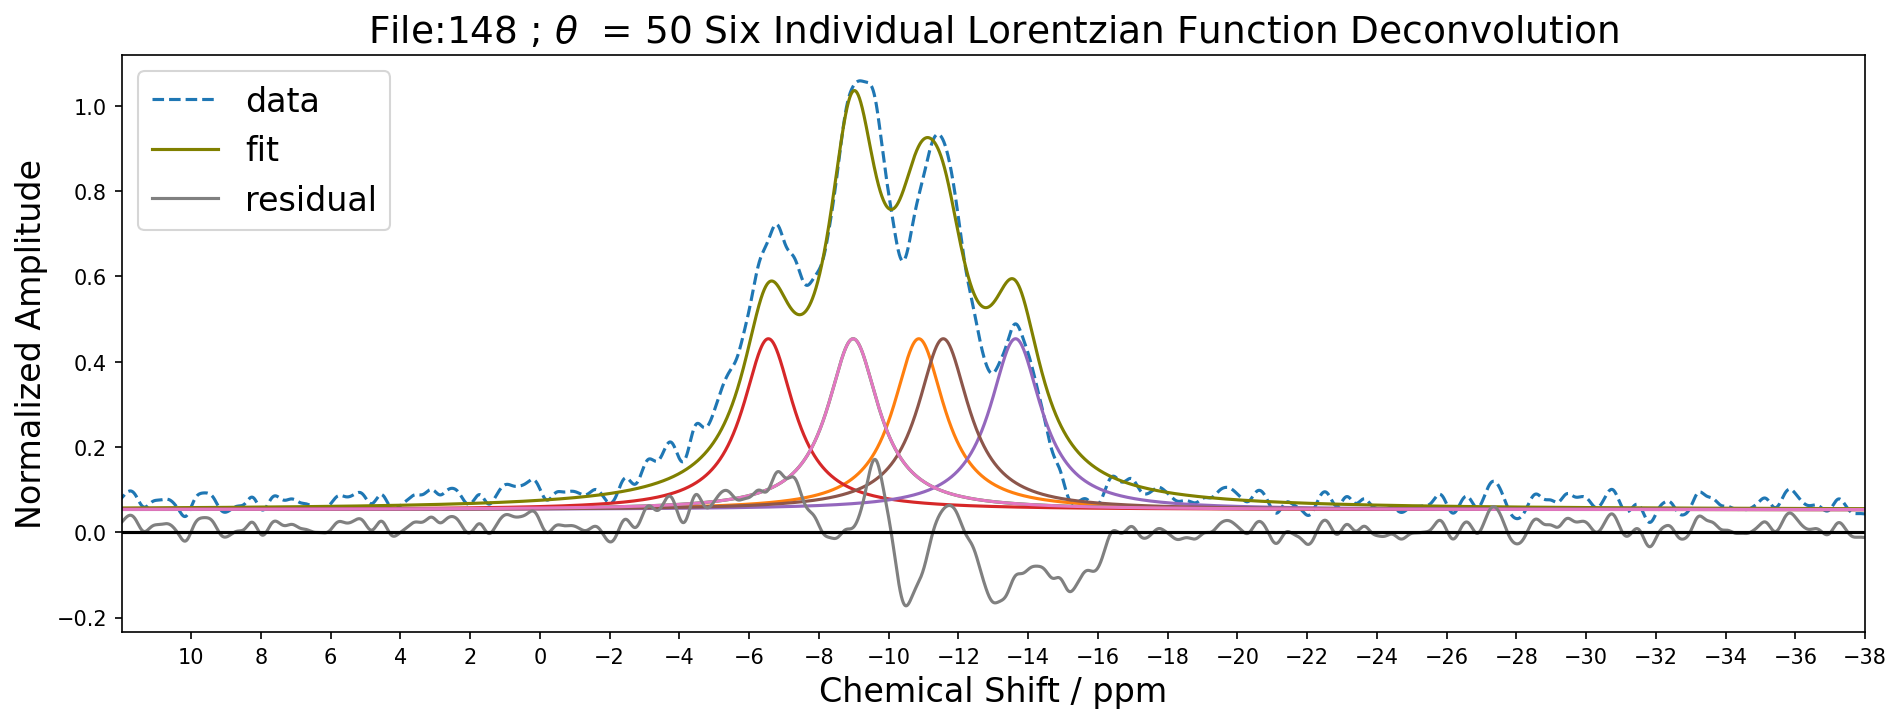

Results for data file SW_Shiva148.txt:
gamma = 1.5906644716399534
center_1 = -10.860815468769779
center_2 = -8.978220066008795
center_3 = -6.54707323989778
center_4 = -13.63452303109417
center_5 = -11.562173767030583
center_6 = -8.97890873931732
A = 0.637640386755865
offset = 0.05279298728852569


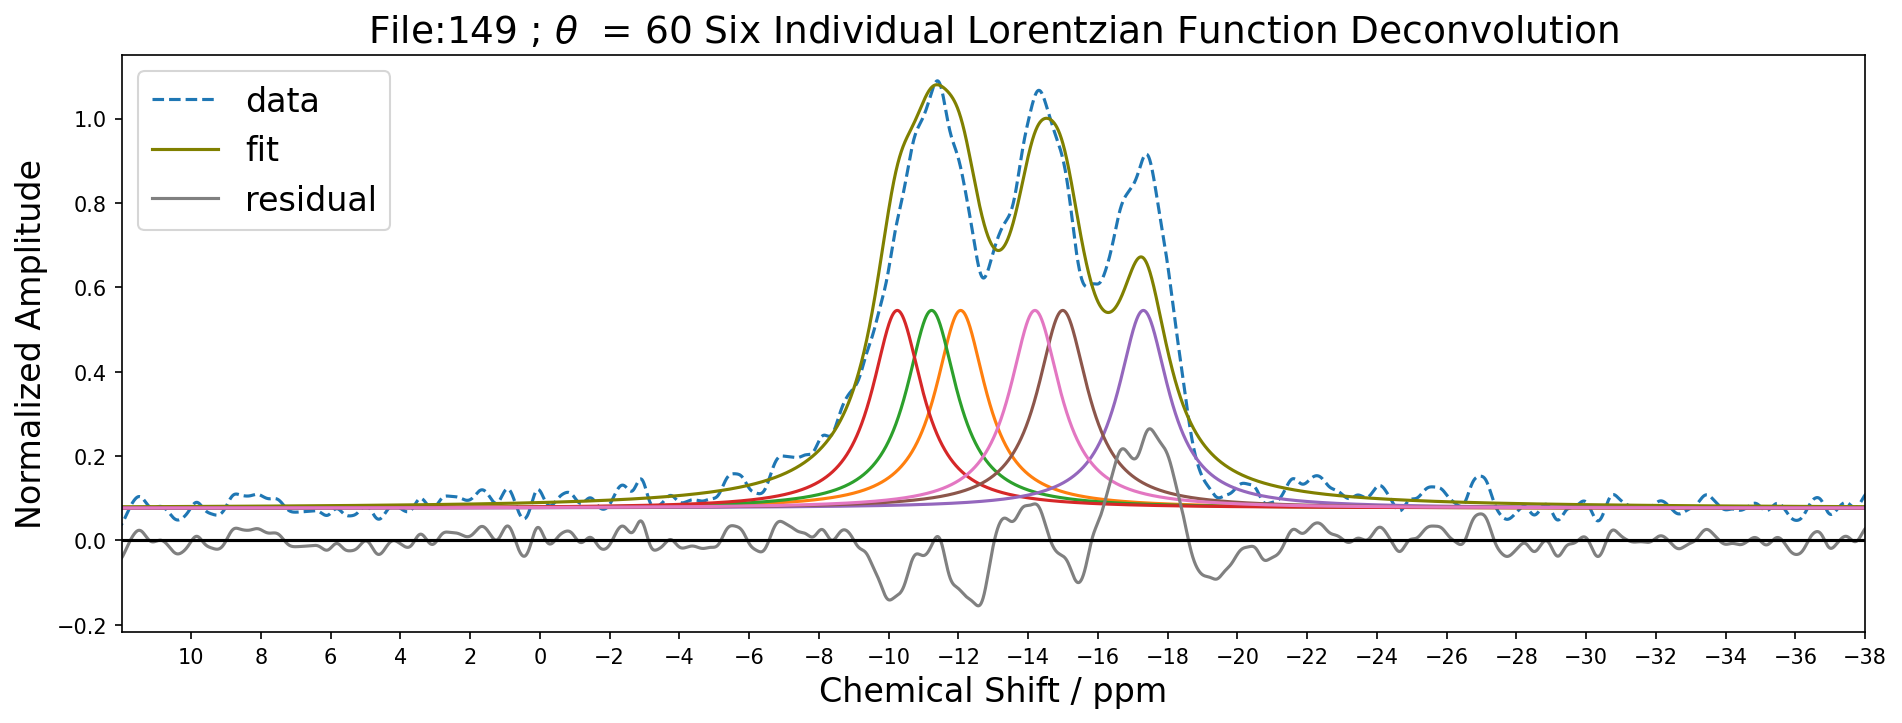

Results for data file SW_Shiva149.txt:
gamma = 1.563452443196127
center_1 = -12.060982174431636
center_2 = -11.22760063512662
center_3 = -10.242917123099996
center_4 = -17.299495802453077
center_5 = -14.987712709686363
center_6 = -14.19066072531023
A = 0.733008485450943
offset = 0.07635450627397813


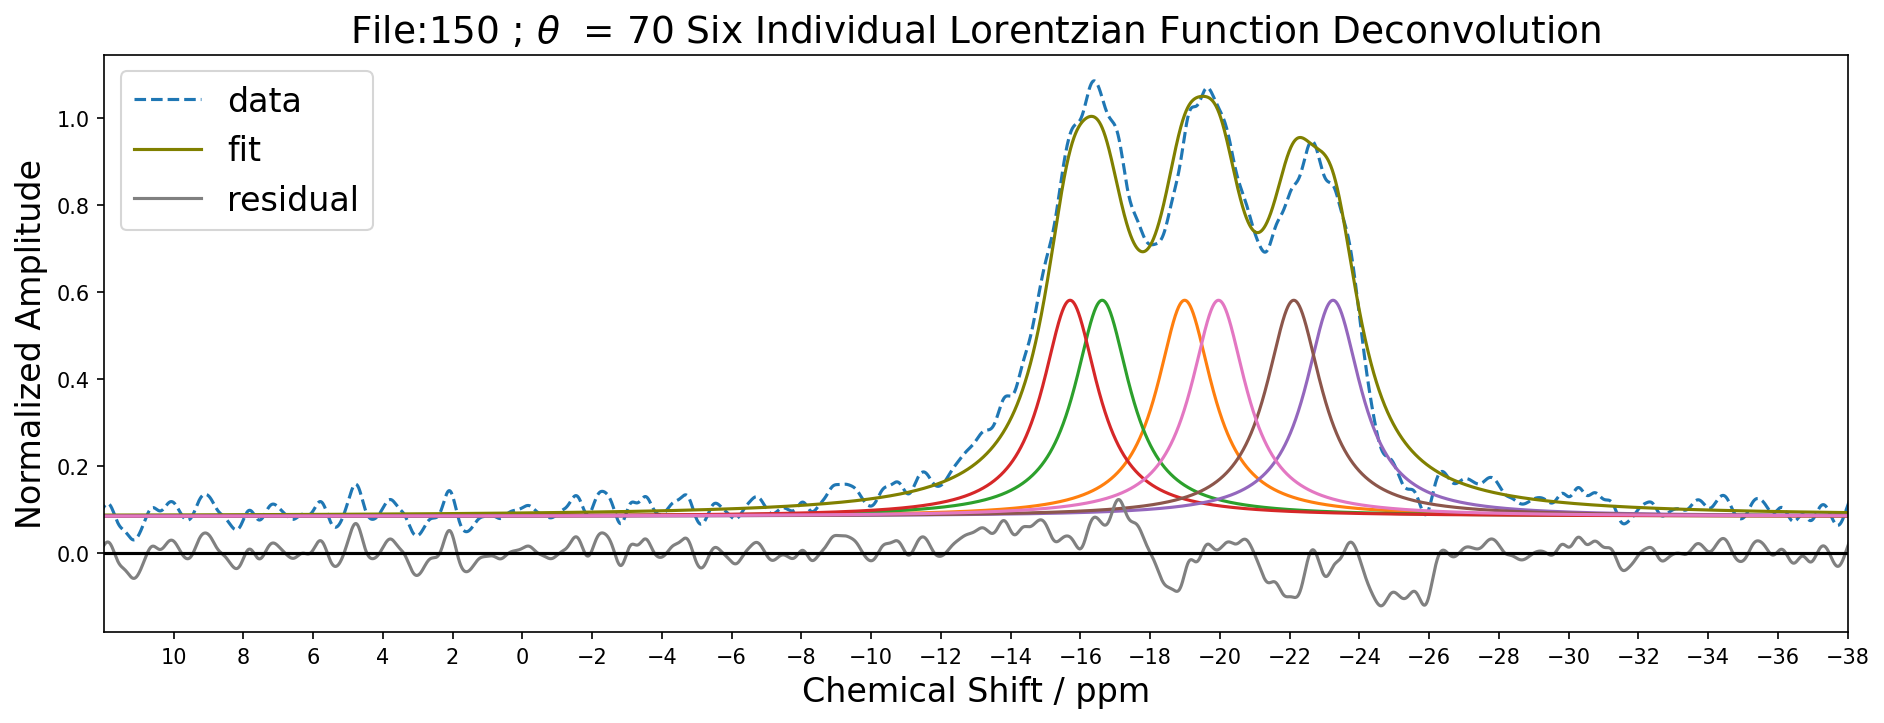

Results for data file SW_Shiva150.txt:
gamma = 1.7162251169144747
center_1 = -18.98513411047746
center_2 = -16.620243097581067
center_3 = -15.700502713857558
center_4 = -23.23984597374055
center_5 = -22.114494642613522
center_6 = -19.95646266289946
A = 0.8518086467105689
offset = 0.08529494656798421


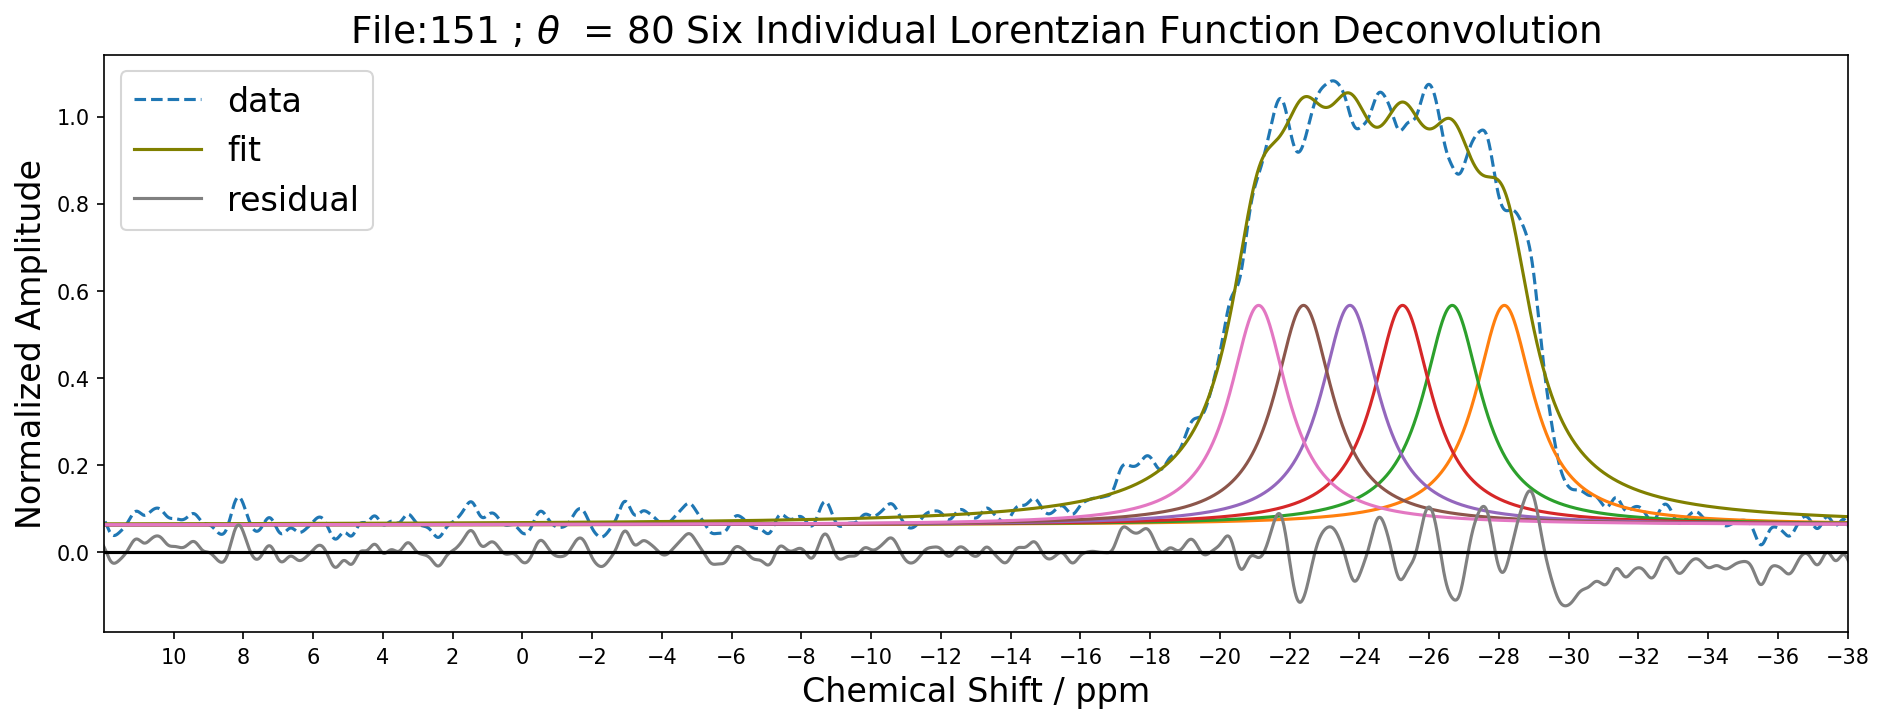

Results for data file SW_Shiva151.txt:
gamma = 1.7988612162406457
center_1 = -28.152998368601956
center_2 = -26.658521743035777
center_3 = -25.234582039864254
center_4 = -23.725294842061768
center_5 = -22.394117939058845
center_6 = -21.106389986340655
A = 0.9077319394408517
offset = 0.06137700535615897


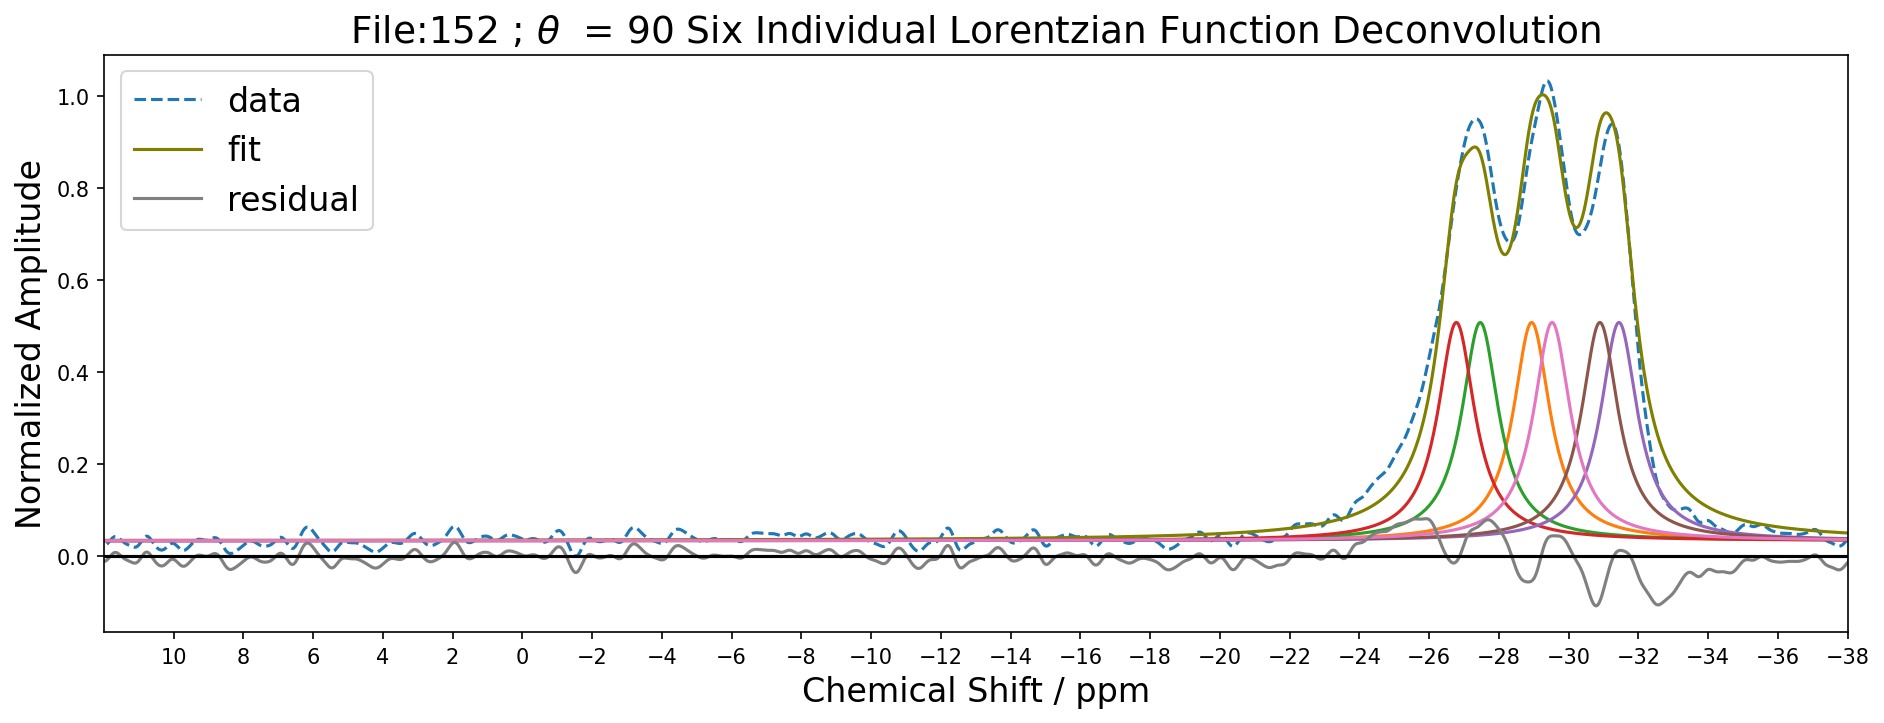

Results for data file SW_Shiva152.txt:
gamma = 1.1367054323038666
center_1 = -28.93569887128159
center_2 = -27.46158577593897
center_3 = -26.775526217996386
center_4 = -31.439345853866957
center_5 = -30.891700976998205
center_6 = -29.52070104110753
A = 0.5394475846529794
offset = 0.033822939864470145


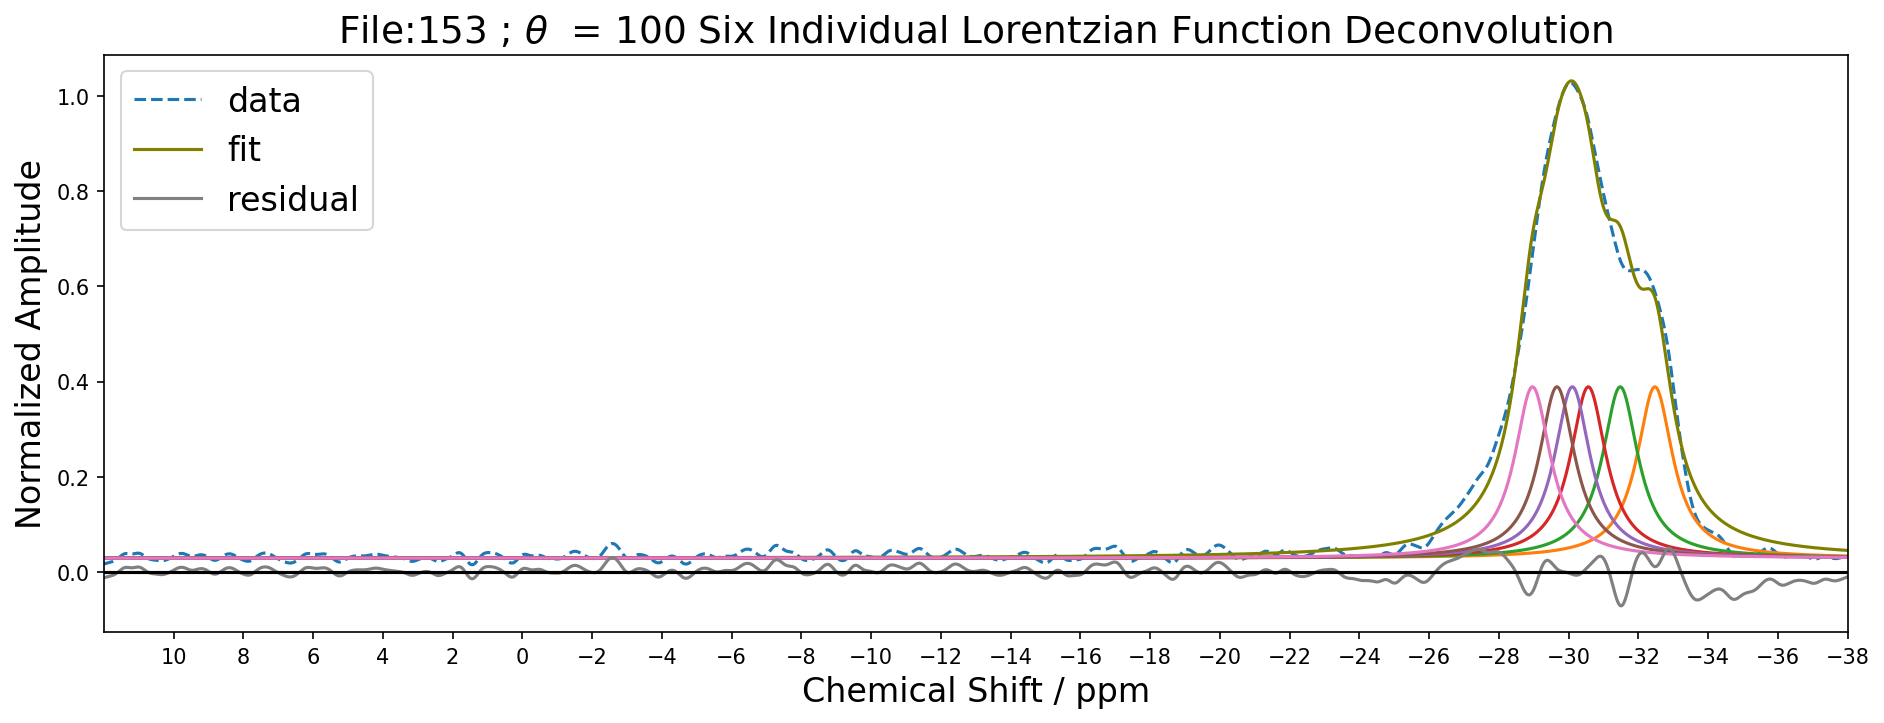

Results for data file SW_Shiva153.txt:
gamma = 1.107550628021382
center_1 = -32.46943477384521
center_2 = -31.475286496673032
center_3 = -30.559298669323898
center_4 = -30.10189133180475
center_5 = -29.660369933699513
center_6 = -28.95949799062977
A = 0.39907861232841996
offset = 0.02862091728543708


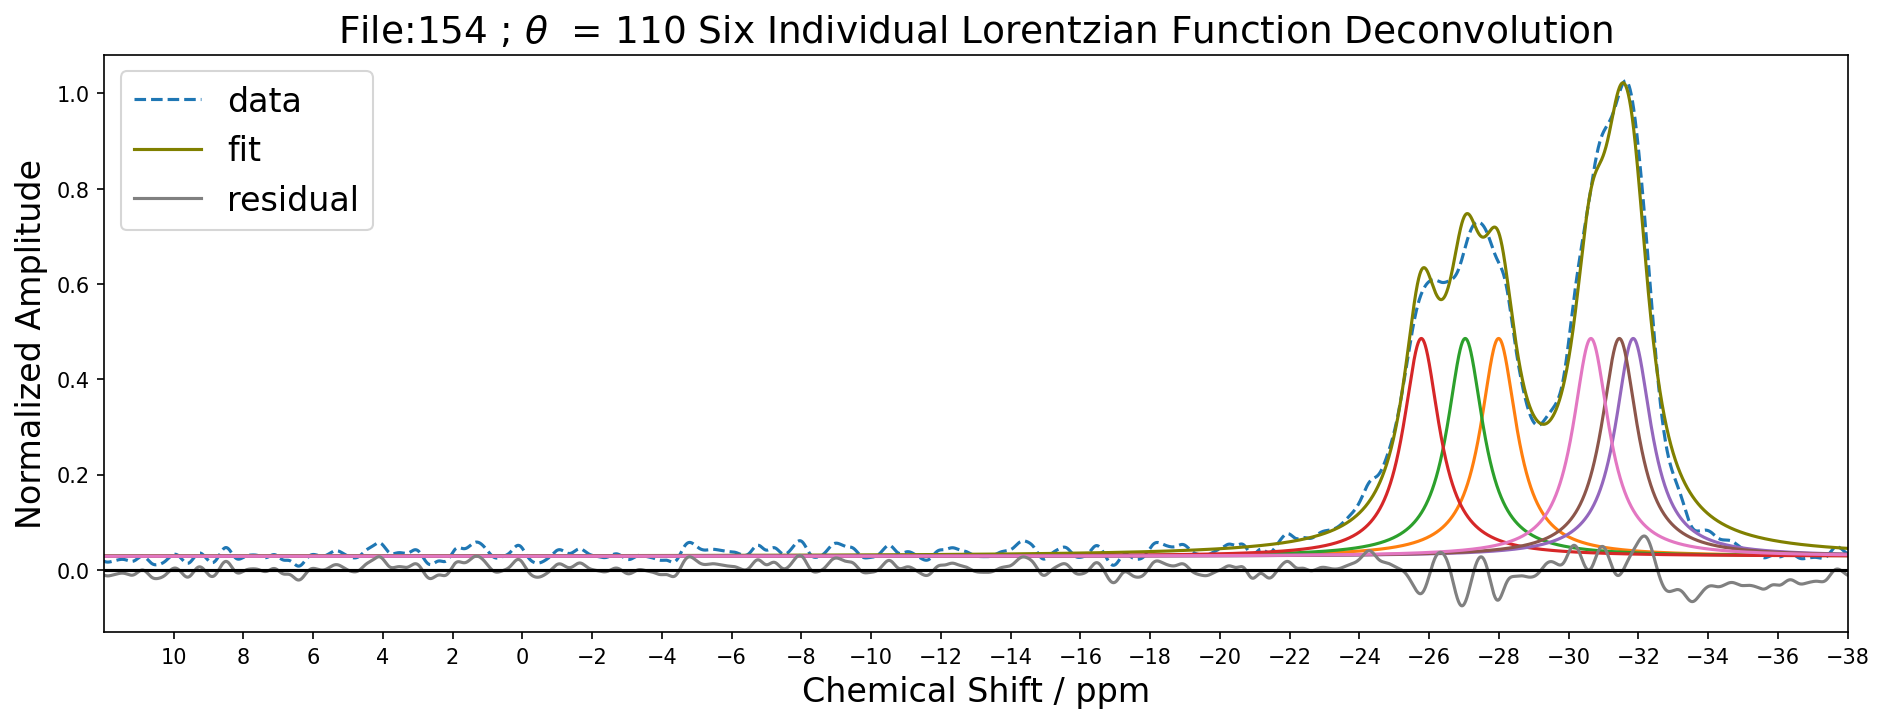

Results for data file SW_Shiva154.txt:
gamma = 1.1142724272241225
center_1 = -27.987735322218207
center_2 = -27.03059644057088
center_3 = -25.77058007216101
center_4 = -31.847309563834678
center_5 = -31.449266515047324
center_6 = -30.634662534503505
A = 0.5095214835655376
offset = 0.028304516746710147


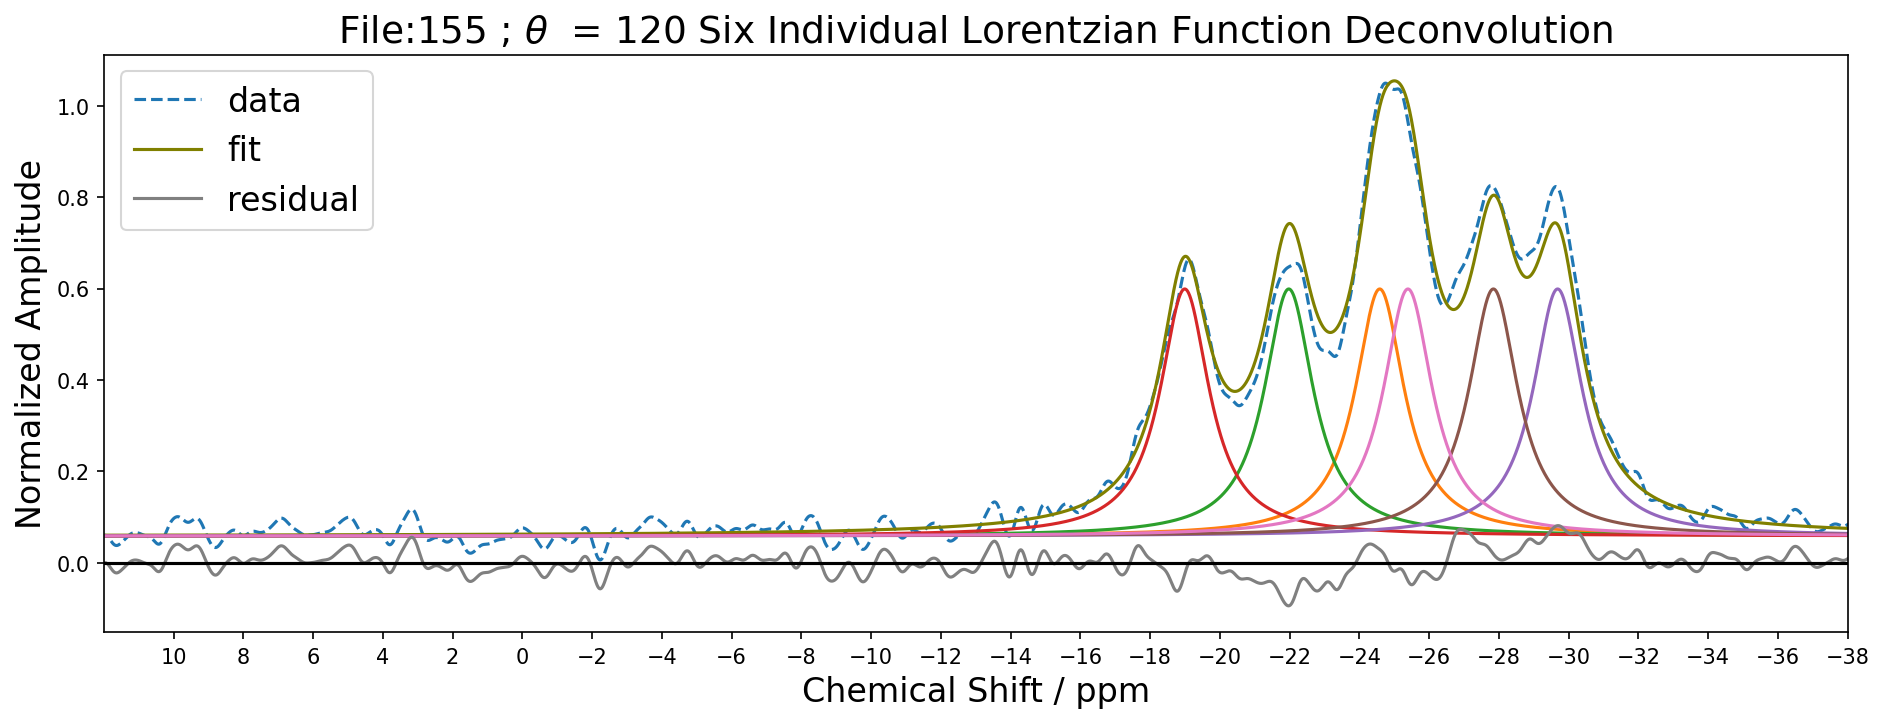

Results for data file SW_Shiva155.txt:
gamma = 1.5136160587773109
center_1 = -24.578935858364922
center_2 = -21.97162995816914
center_3 = -18.98754701158805
center_4 = -29.680132867885693
center_5 = -27.837829764556833
center_6 = -25.38739522226045
A = 0.8186771382329675
offset = 0.05817791121375795


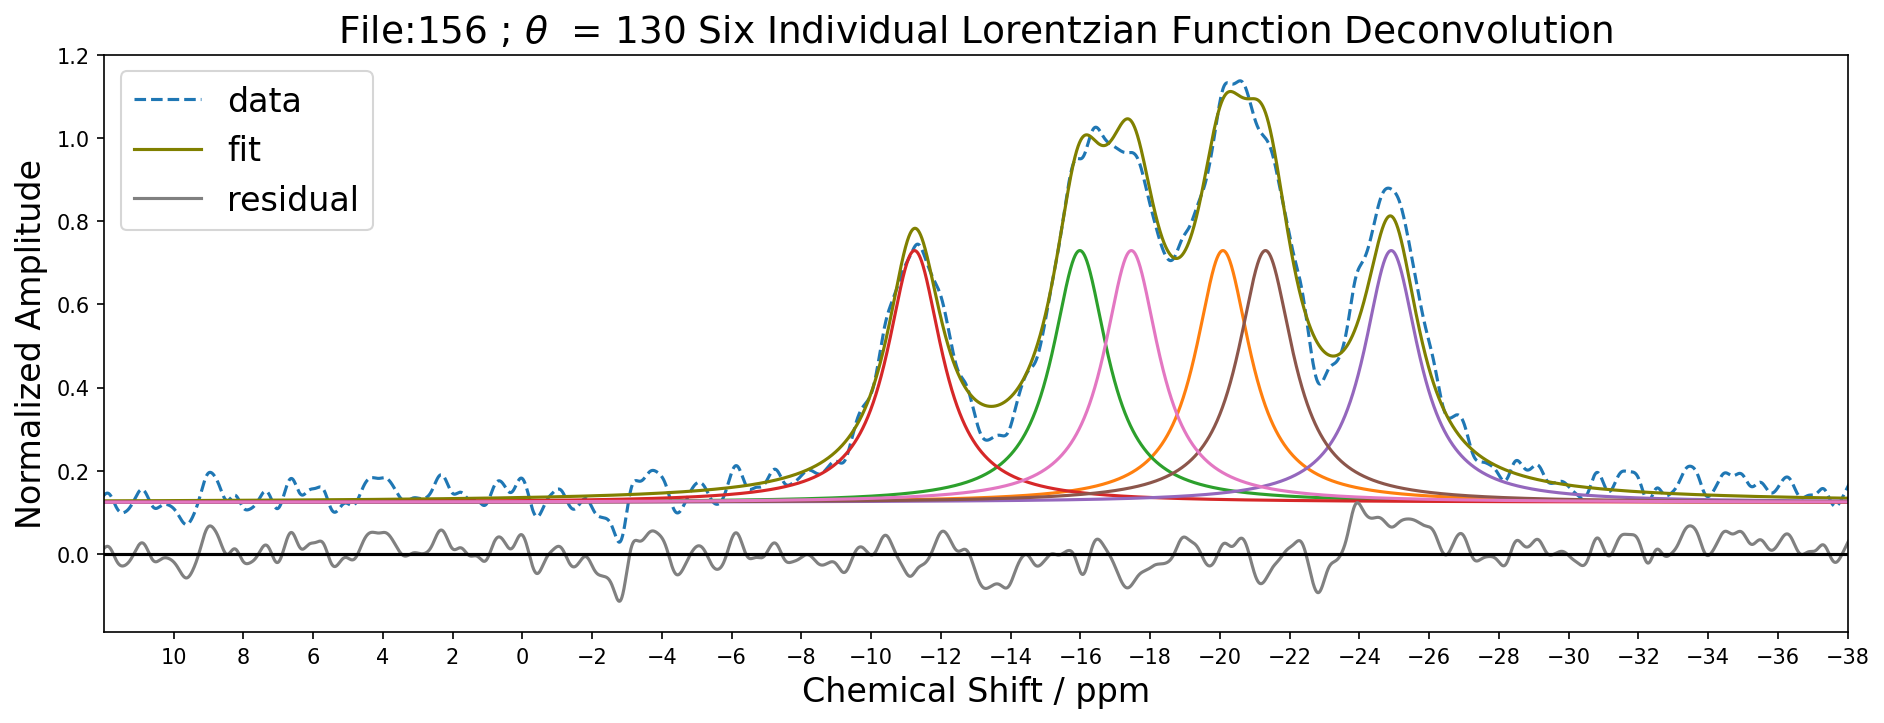

Results for data file SW_Shiva156.txt:
gamma = 1.7022383638986847
center_1 = -20.08192891482612
center_2 = -15.980431578138651
center_3 = -11.240297039772761
center_4 = -24.908507099960172
center_5 = -21.302622610752604
center_6 = -17.456561951778944
A = 1.0301849015603732
offset = 0.12392408156280993


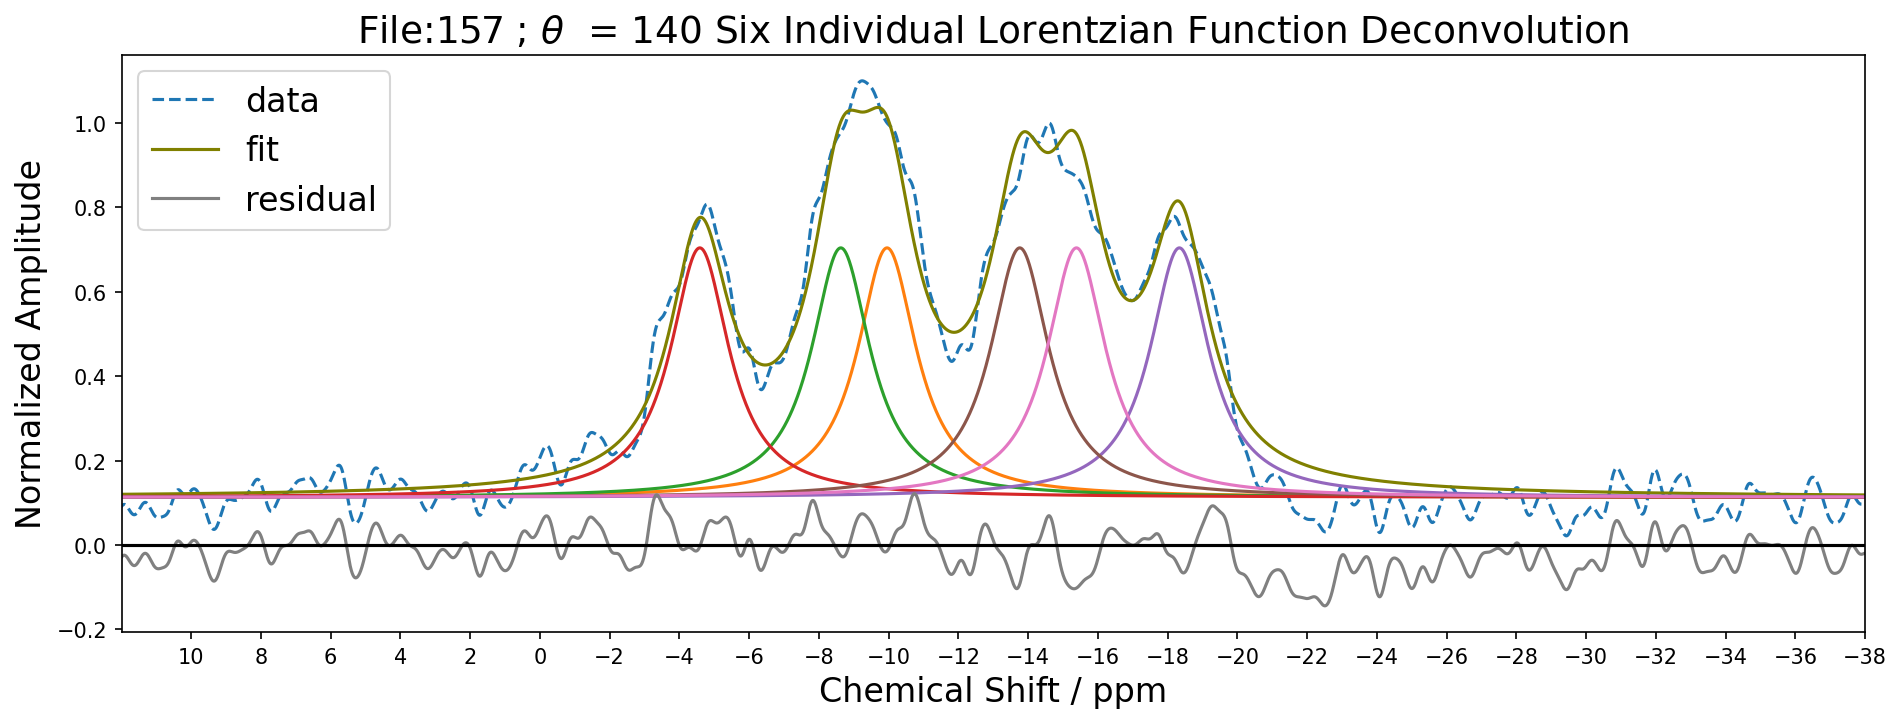

Results for data file SW_Shiva157.txt:
gamma = 1.814393046019724
center_1 = -9.949791242313626
center_2 = -8.62420917686882
center_3 = -4.581166227456177
center_4 = -18.331945475605313
center_5 = -13.755427049585219
center_6 = -15.38044776169615
A = 1.0731363661125422
offset = 0.11283452588120696


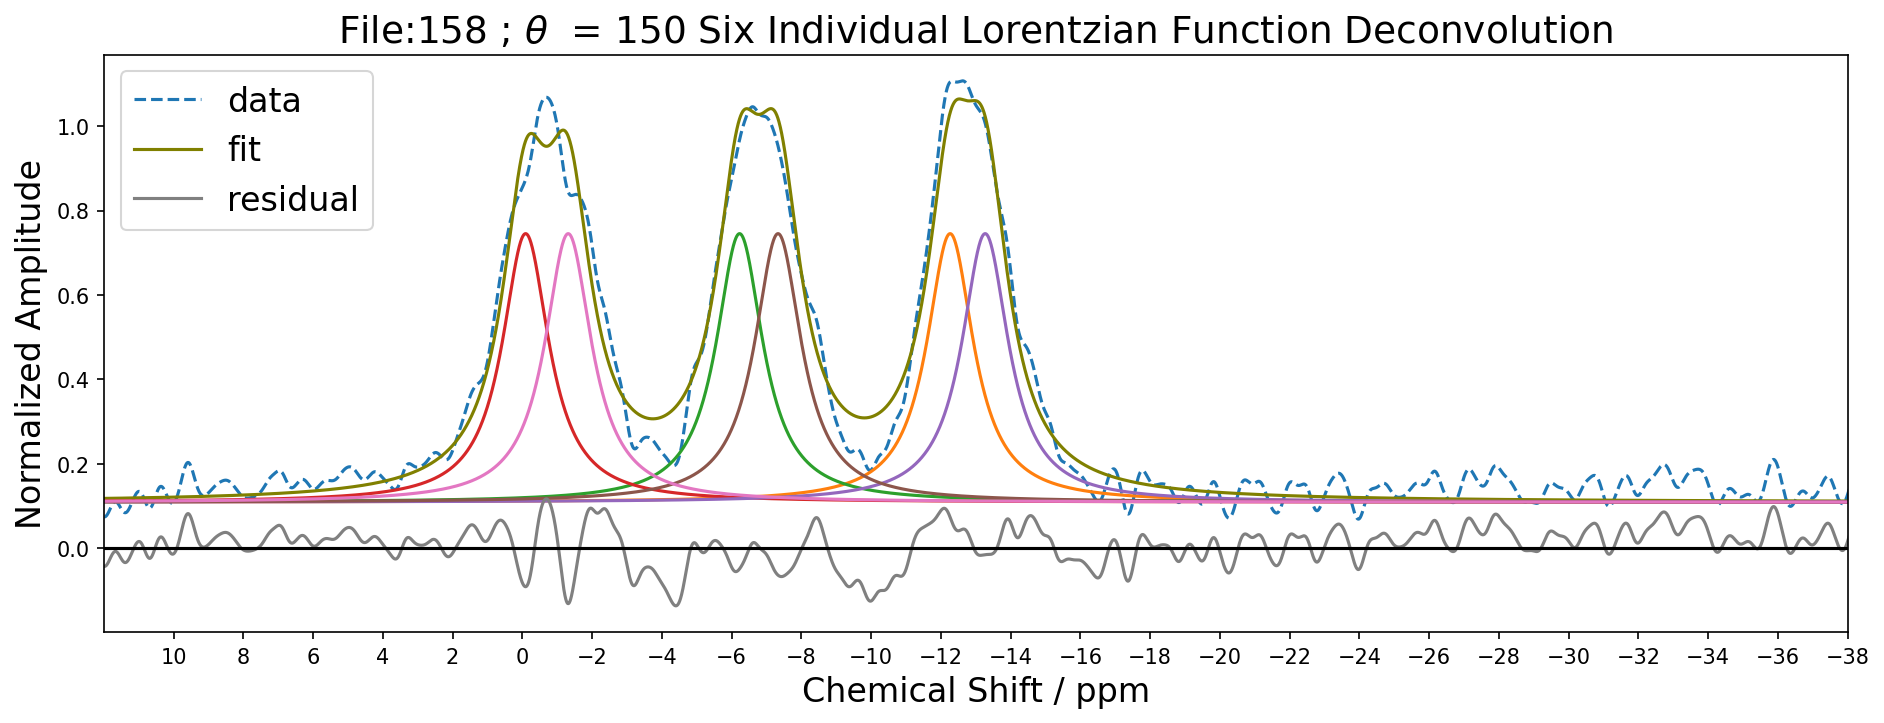

Results for data file SW_Shiva158.txt:
gamma = 1.4426955312046155
center_1 = -12.26059954263036
center_2 = -6.223046068096913
center_3 = -0.0883834800480931
center_4 = -13.26554801074956
center_5 = -7.326202044464501
center_6 = -1.309212343239779
A = 0.918833194318337
offset = 0.10840848774282494


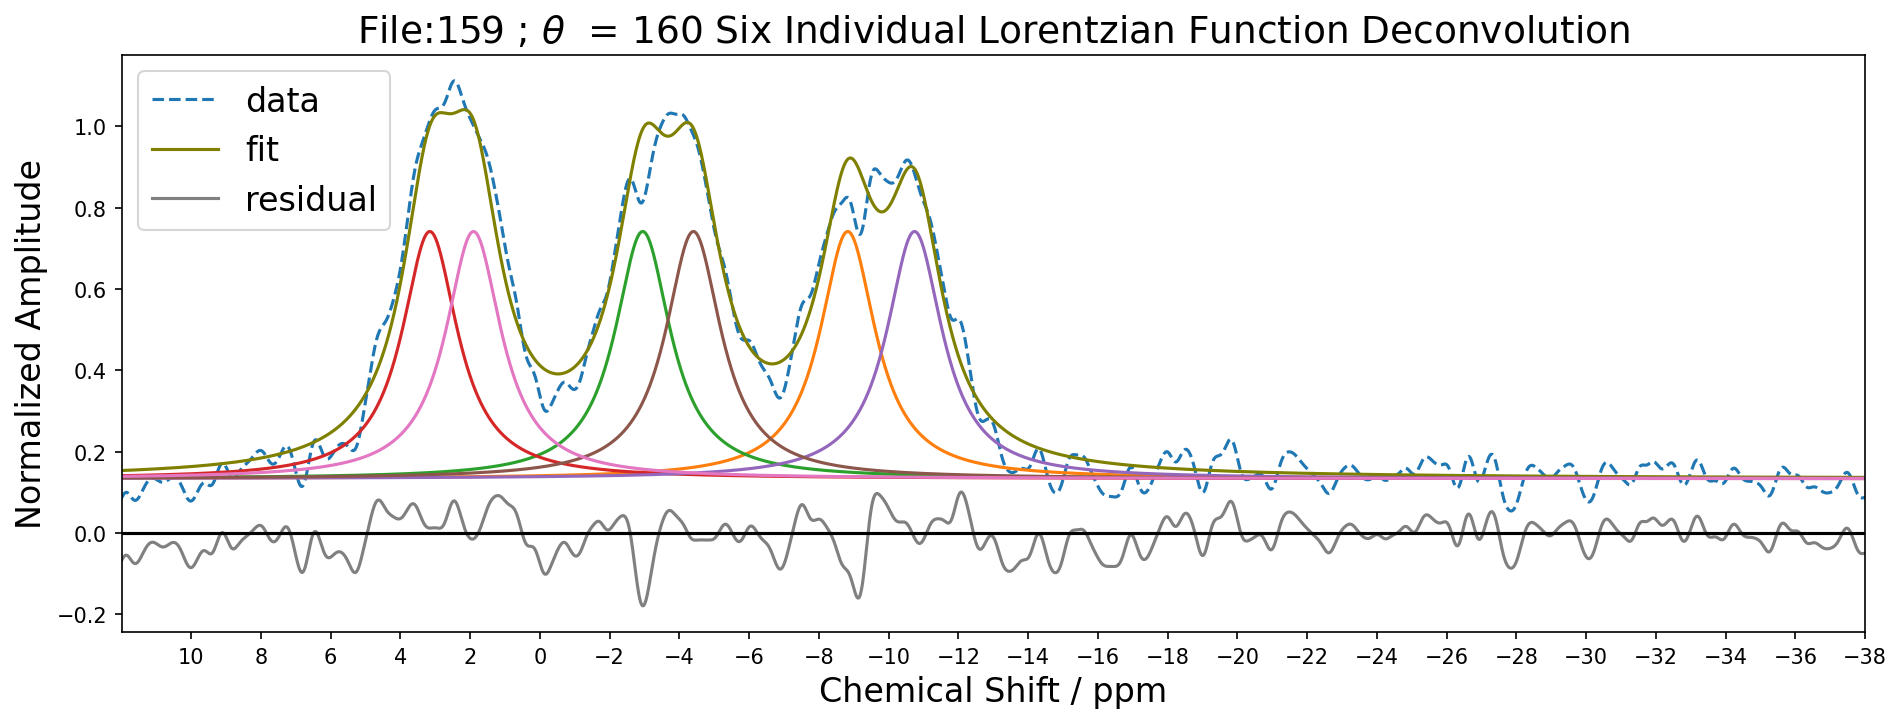

Results for data file SW_Shiva159.txt:
gamma = 1.723442573068082
center_1 = -8.823040210958503
center_2 = -2.943894011475321
center_3 = 3.16012434017098
center_4 = -10.737918518929652
center_5 = -4.3972575254733535
center_6 = 1.9085895924812308
A = 1.0473421054829162
offset = 0.13391304129865517


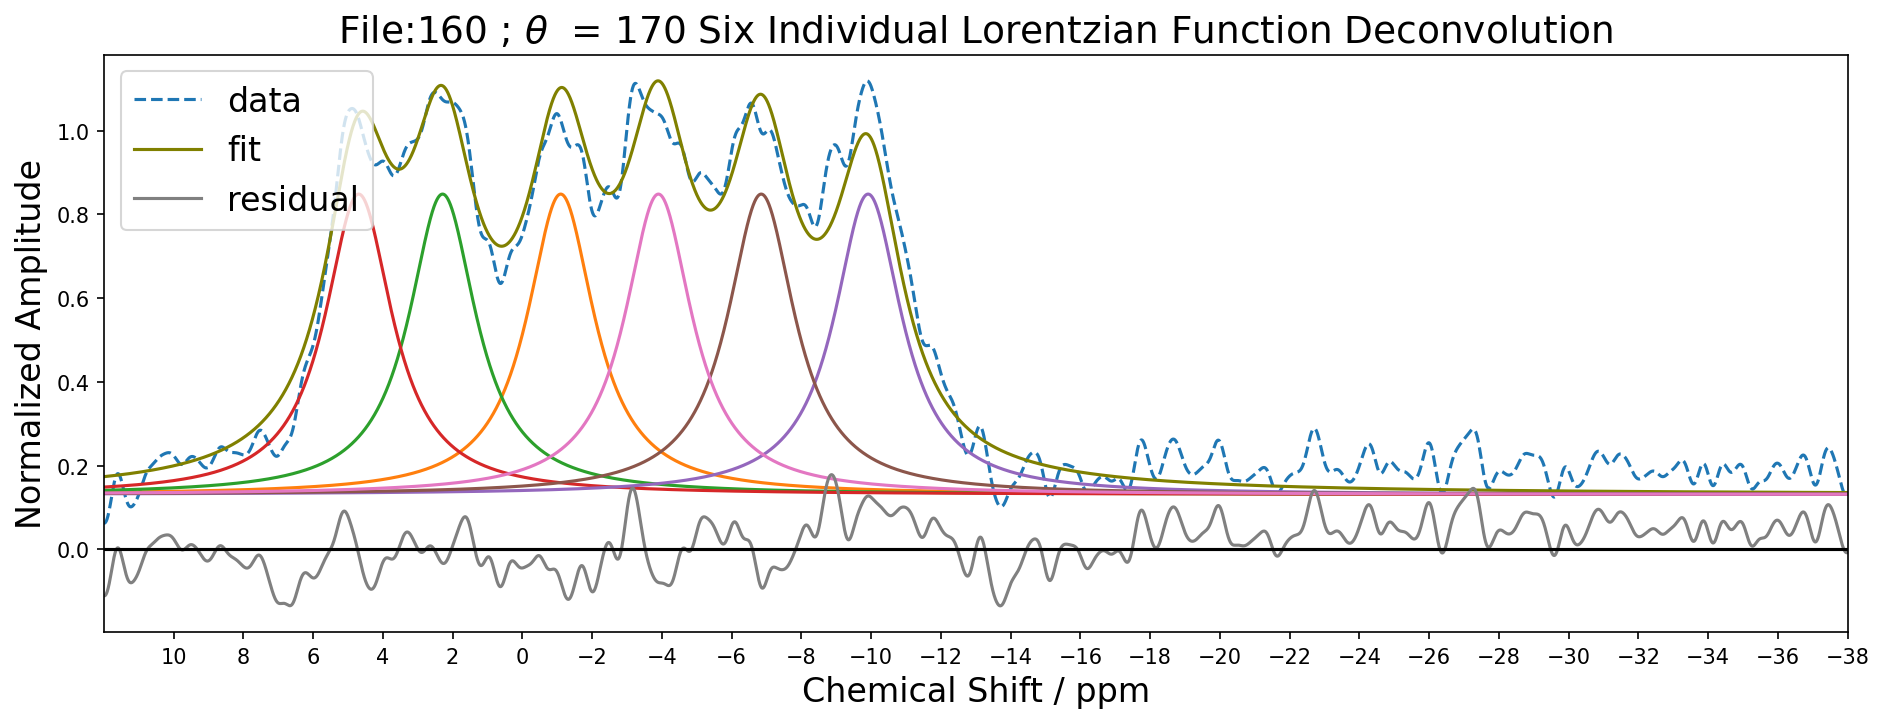

Results for data file SW_Shiva160.txt:
gamma = 2.0829148829597637
center_1 = -1.0944154285567516
center_2 = 2.2931853439292986
center_3 = 4.6983147871043345
center_4 = -9.90785507428738
center_5 = -6.843520049819866
center_6 = -3.8954679501103144
A = 1.4959040480601506
offset = 0.13058789479103355


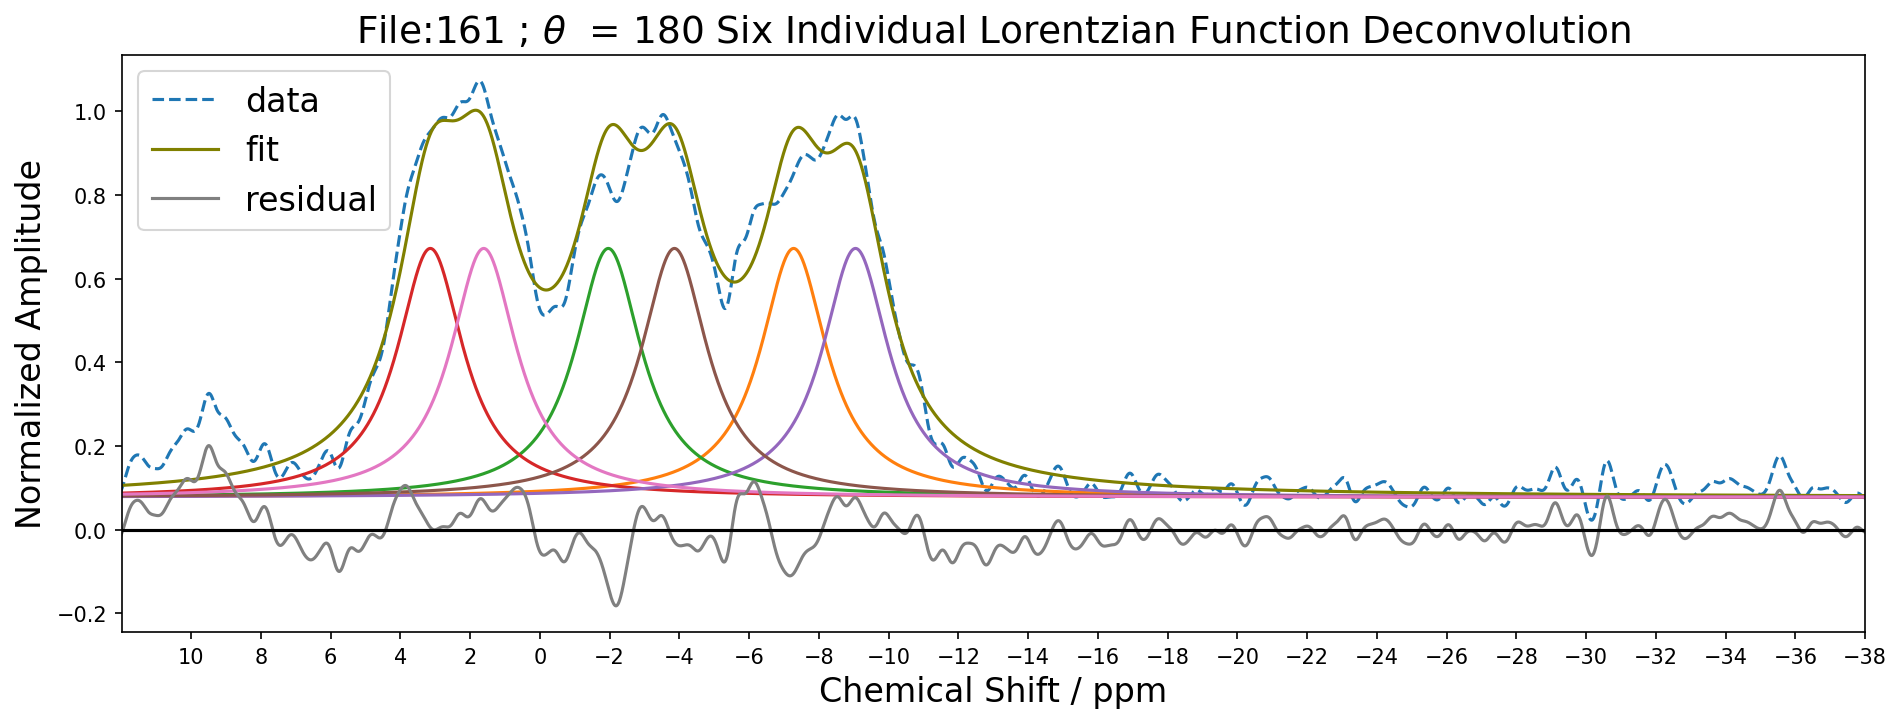

Results for data file SW_Shiva161.txt:
gamma = 2.0517150277756473
center_1 = -7.27142894109605
center_2 = -1.9569432805715763
center_3 = 3.1454433433820252
center_4 = -9.045718136595026
center_5 = -3.8540454285423156
center_6 = 1.6142022884895433
A = 1.2199052827891381
offset = 0.07750049047083515


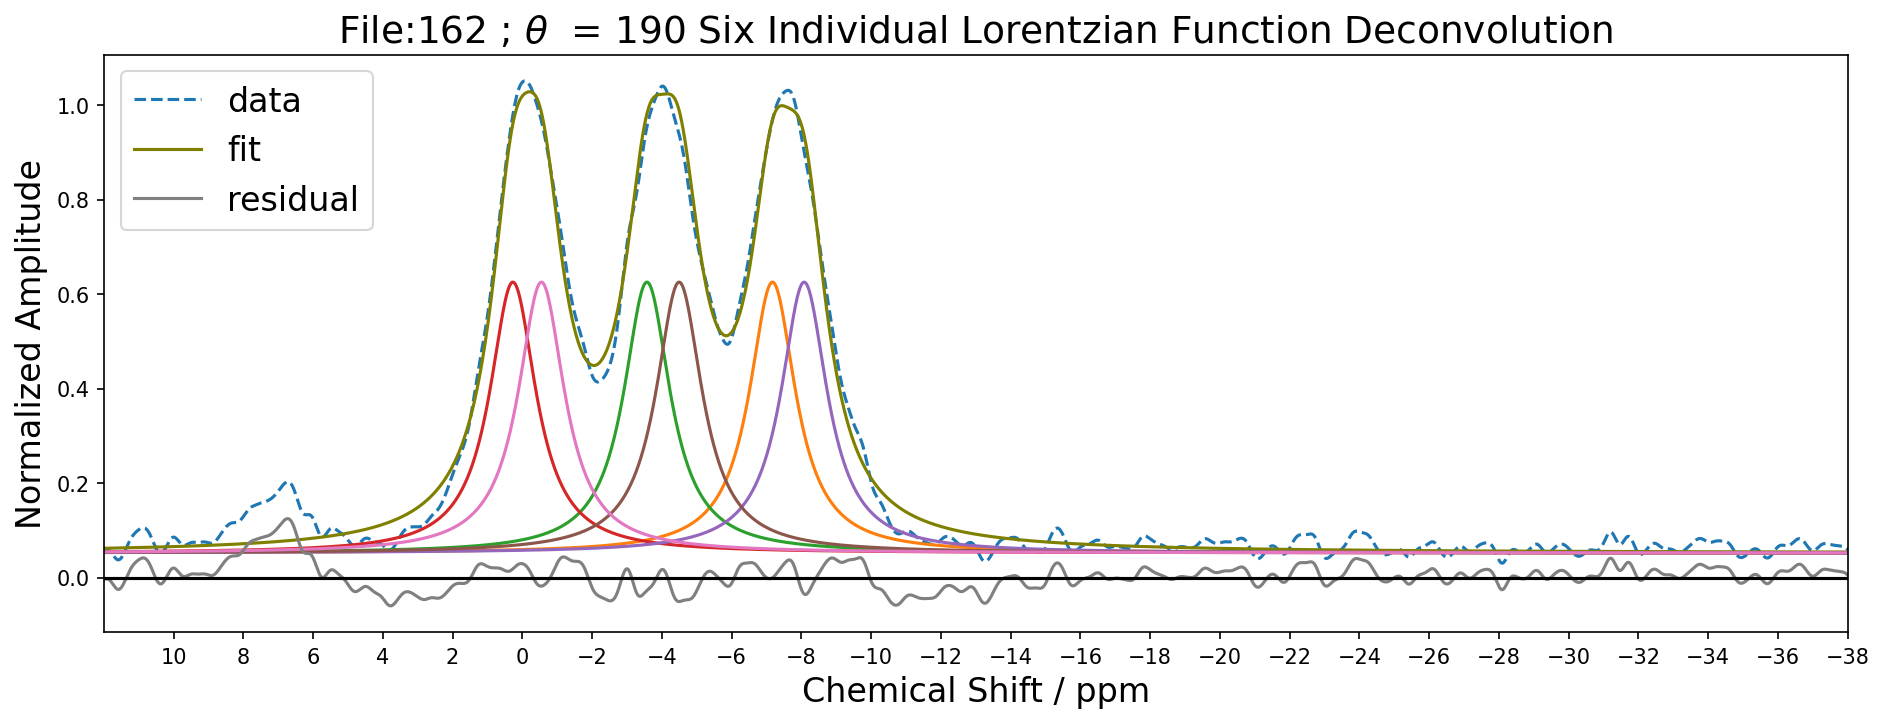

Results for data file SW_Shiva162.txt:
gamma = 1.4321394025933964
center_1 = -7.166294565717896
center_2 = -3.5672068823357326
center_3 = 0.2767969597538786
center_4 = -8.074460054403941
center_5 = -4.489707803772826
center_6 = -0.5409389564669629
A = 0.8208047404953298
offset = 0.0520148332068722


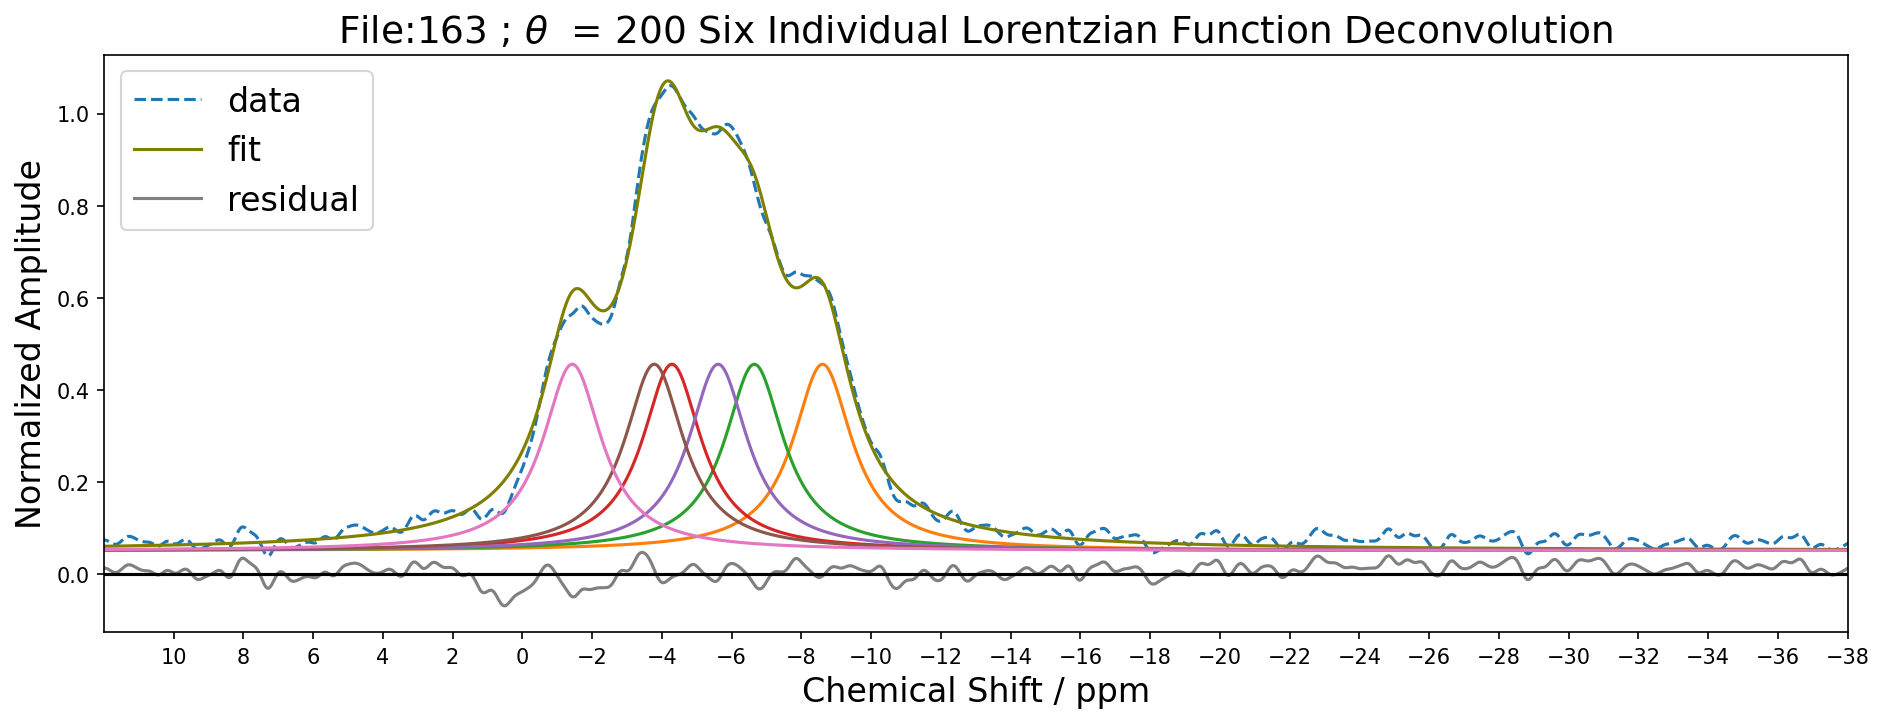

Results for data file SW_Shiva163.txt:
gamma = 1.8235923631202244
center_1 = -8.601139970526441
center_2 = -6.645757893505662
center_3 = -4.2825692477708825
center_4 = -5.607352829795882
center_5 = -3.7765714097262895
center_6 = -1.4251281953556993
A = 0.7373842569624162
offset = 0.05154144675770574


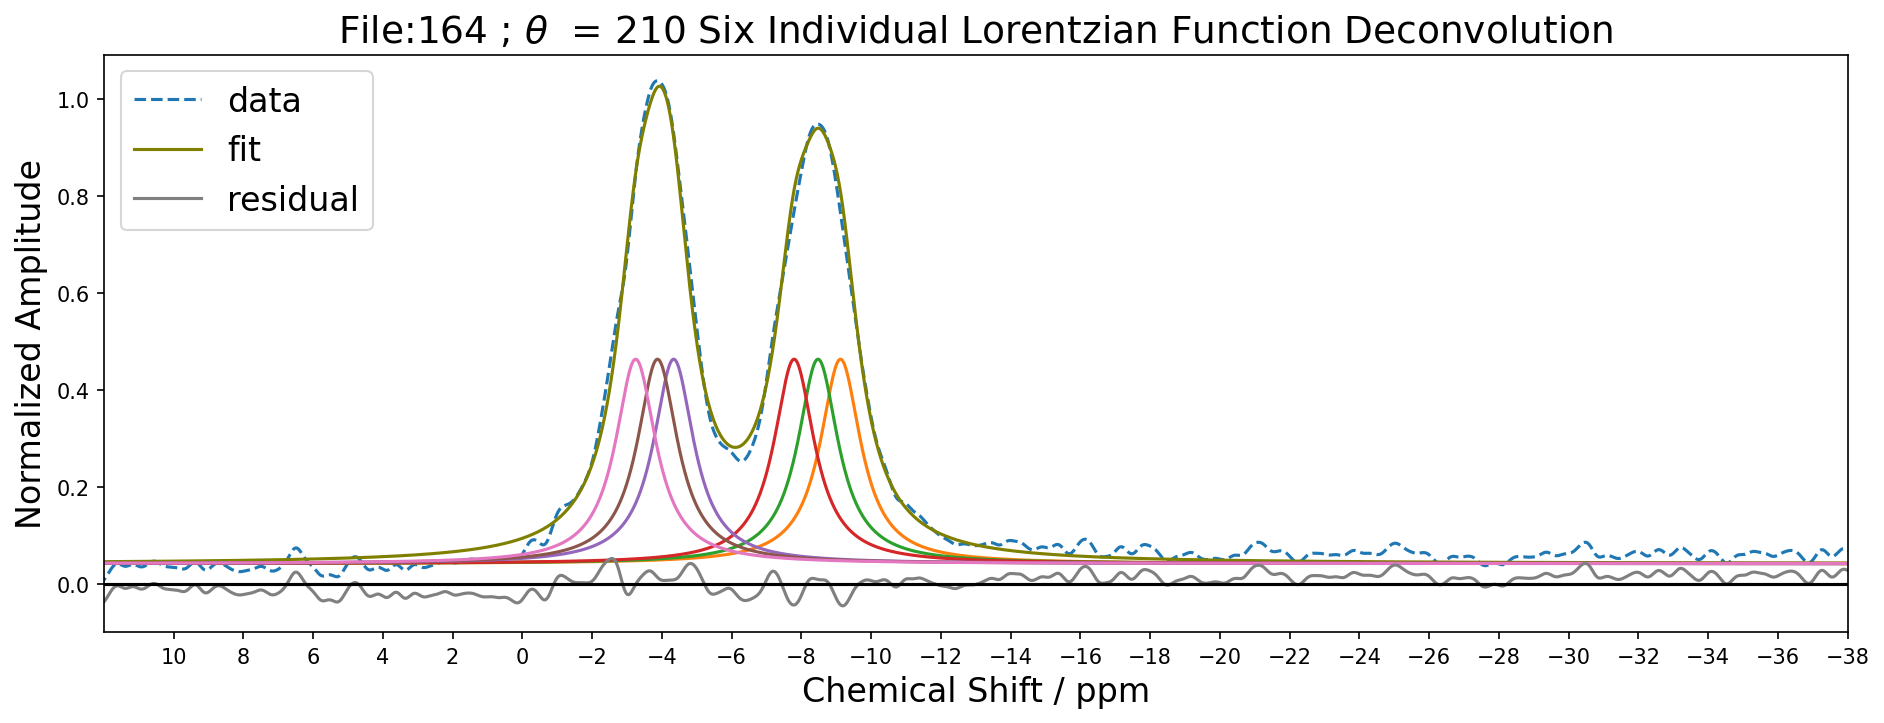

Results for data file SW_Shiva164.txt:
gamma = 1.251305067450159
center_1 = -9.116972587262532
center_2 = -8.472627164434758
center_3 = -7.787695761910682
center_4 = -4.333431409553856
center_5 = -3.8699800301858542
center_6 = -3.243927465571804
A = 0.527778119796113
offset = 0.04123631577272829


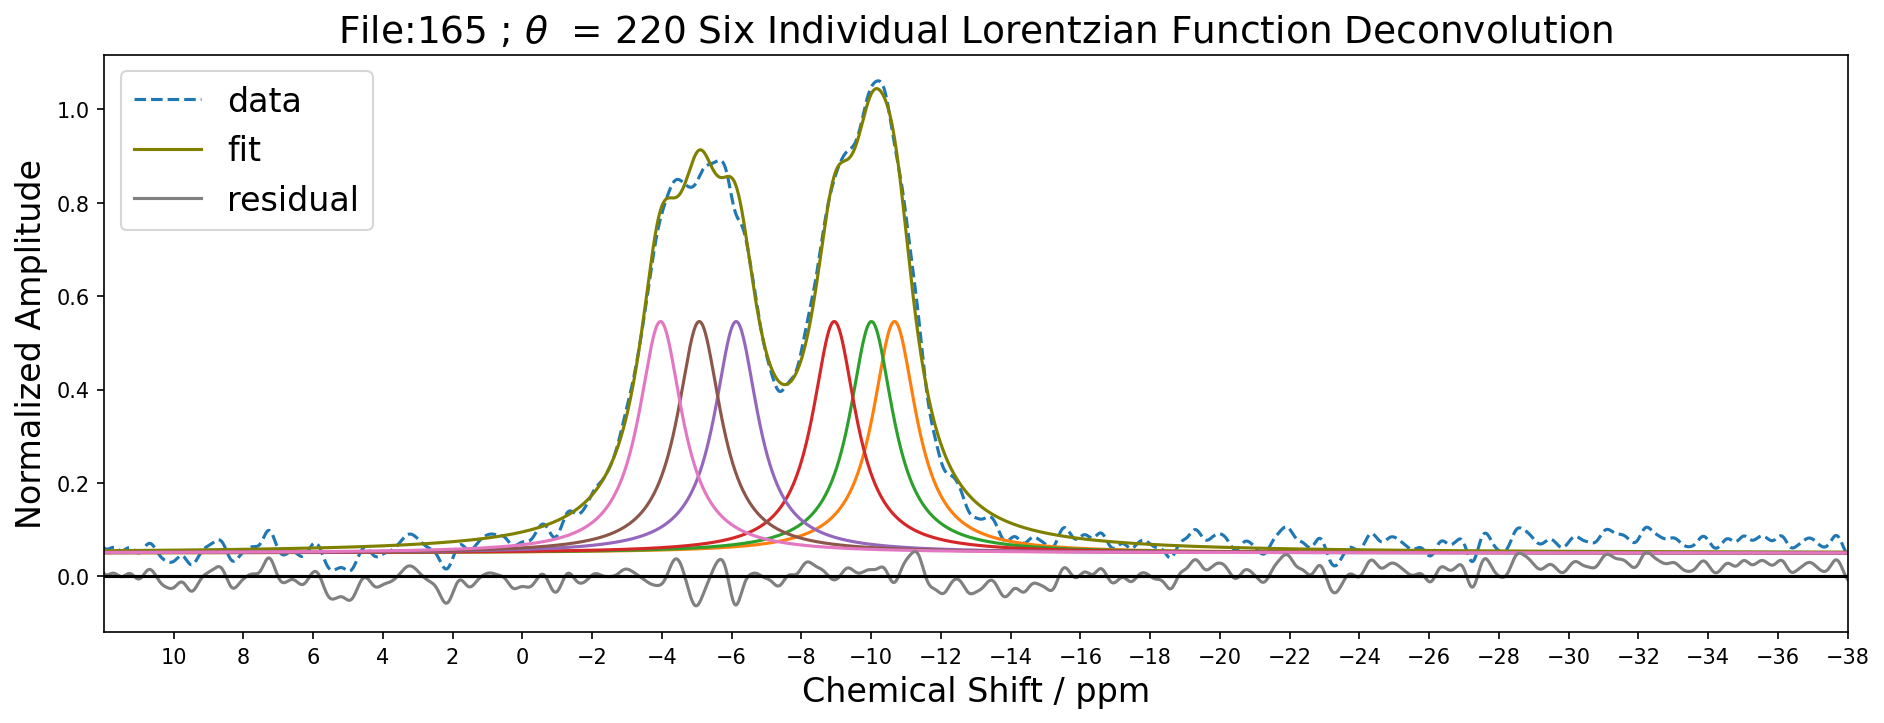

Results for data file SW_Shiva165.txt:
gamma = 1.3511257875806075
center_1 = -10.665199589771056
center_2 = -10.00474564692177
center_3 = -8.937920394535825
center_4 = -6.124385516386358
center_5 = -5.067436581727074
center_6 = -3.955785508791697
A = 0.6694547545404775
offset = 0.05020738465724048


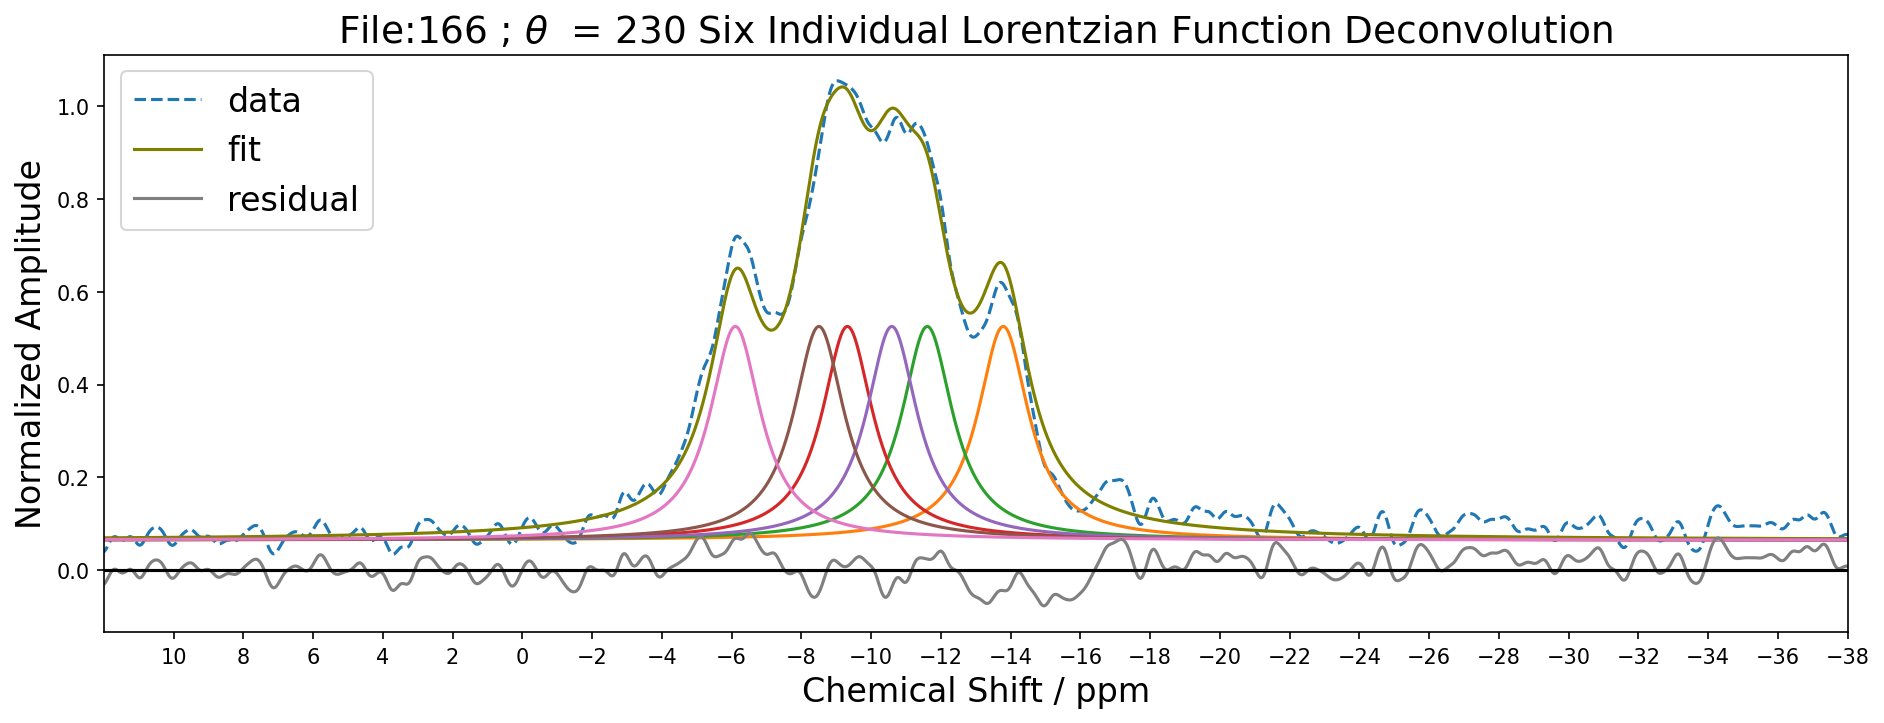

Results for data file SW_Shiva166.txt:
gamma = 1.5737325198057317
center_1 = -13.783217646163608
center_2 = -11.605918727262969
center_3 = -9.31527526052861
center_4 = -10.588304056398817
center_5 = -8.498243675953344
center_6 = -6.102280321839631
A = 0.7234021244232705
offset = 0.06530880033724124


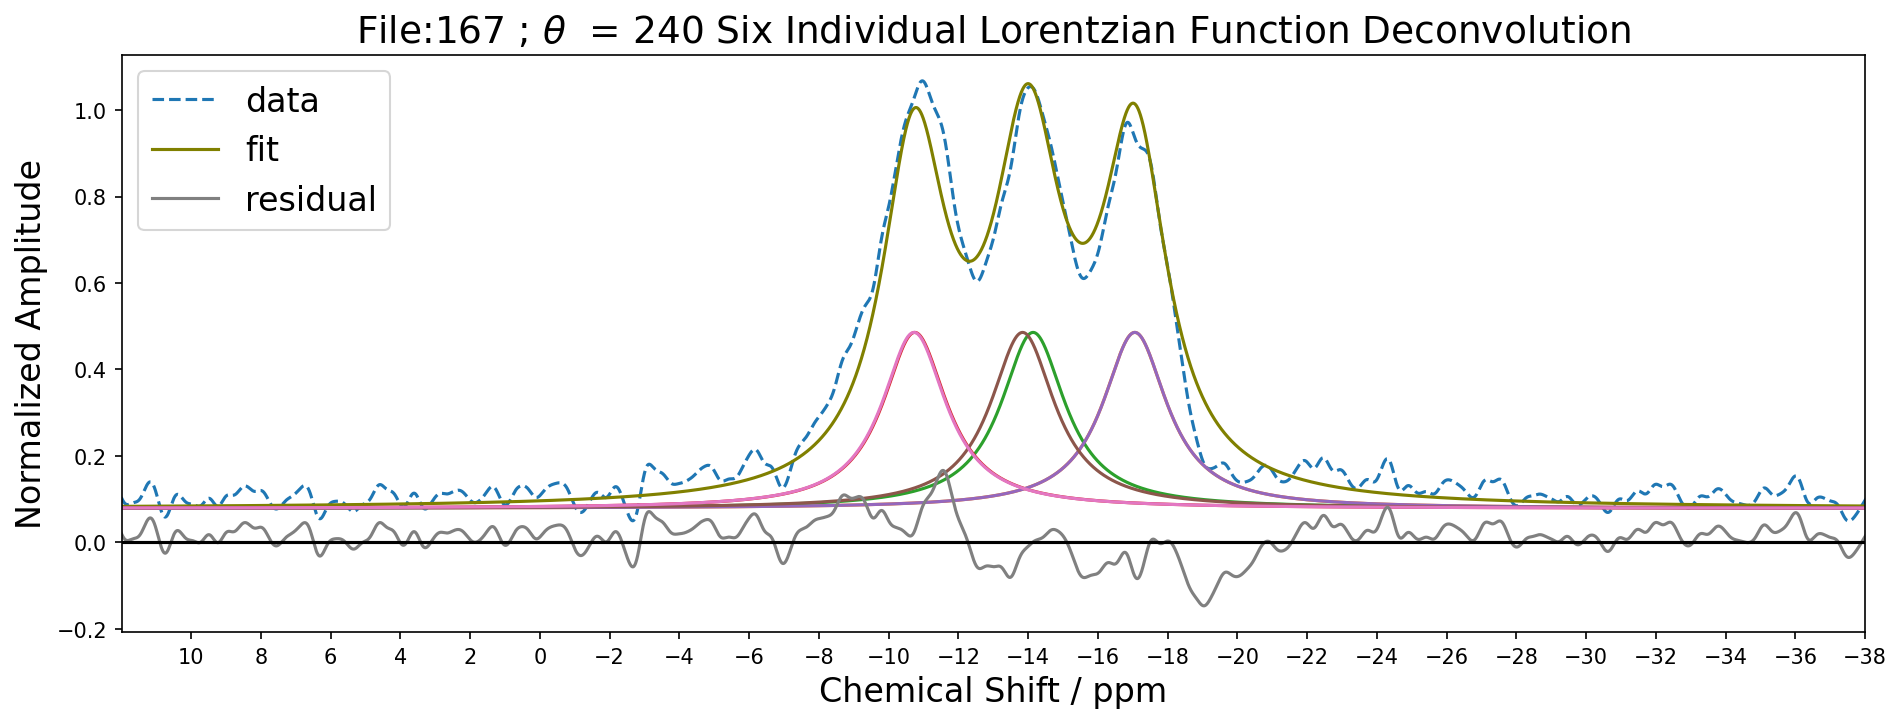

Results for data file SW_Shiva167.txt:
gamma = 1.989789412240715
center_1 = -17.053576449577744
center_2 = -14.138181267623343
center_3 = -10.745000962055432
center_4 = -17.054943175819155
center_5 = -13.836237974198388
center_6 = -10.723087900975328
A = 0.8101519736343006
offset = 0.07839695613440462


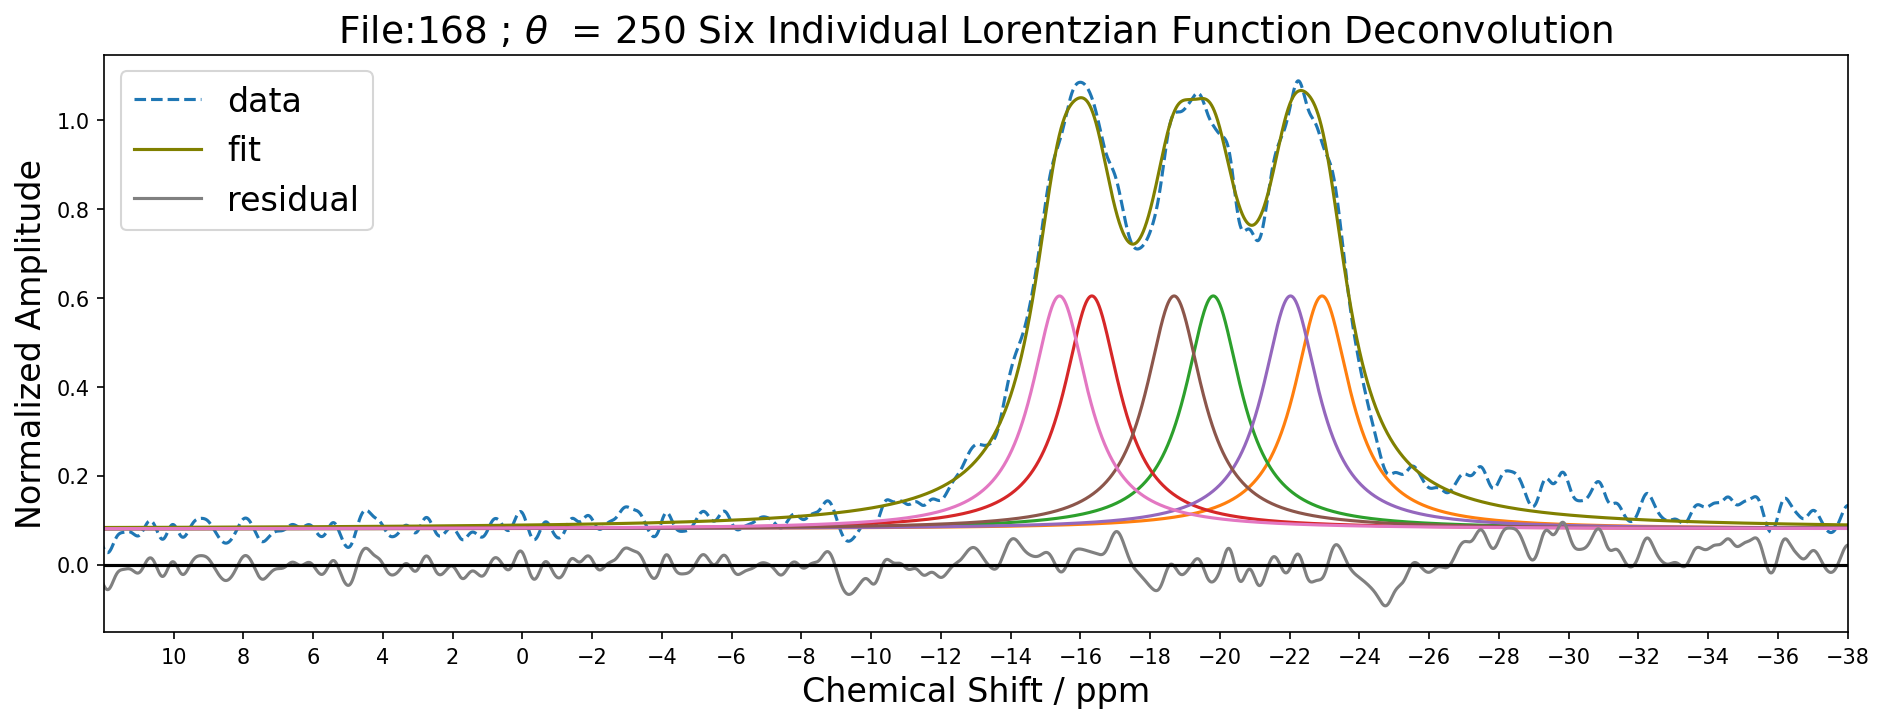

Results for data file SW_Shiva168.txt:
gamma = 1.7341875163666256
center_1 = -22.925296375886088
center_2 = -19.80486549470354
center_3 = -16.324286146944775
center_4 = -22.020108655670825
center_5 = -18.682922735762492
center_6 = -15.39761311895407
A = 0.9083365076534401
offset = 0.08004711992715291


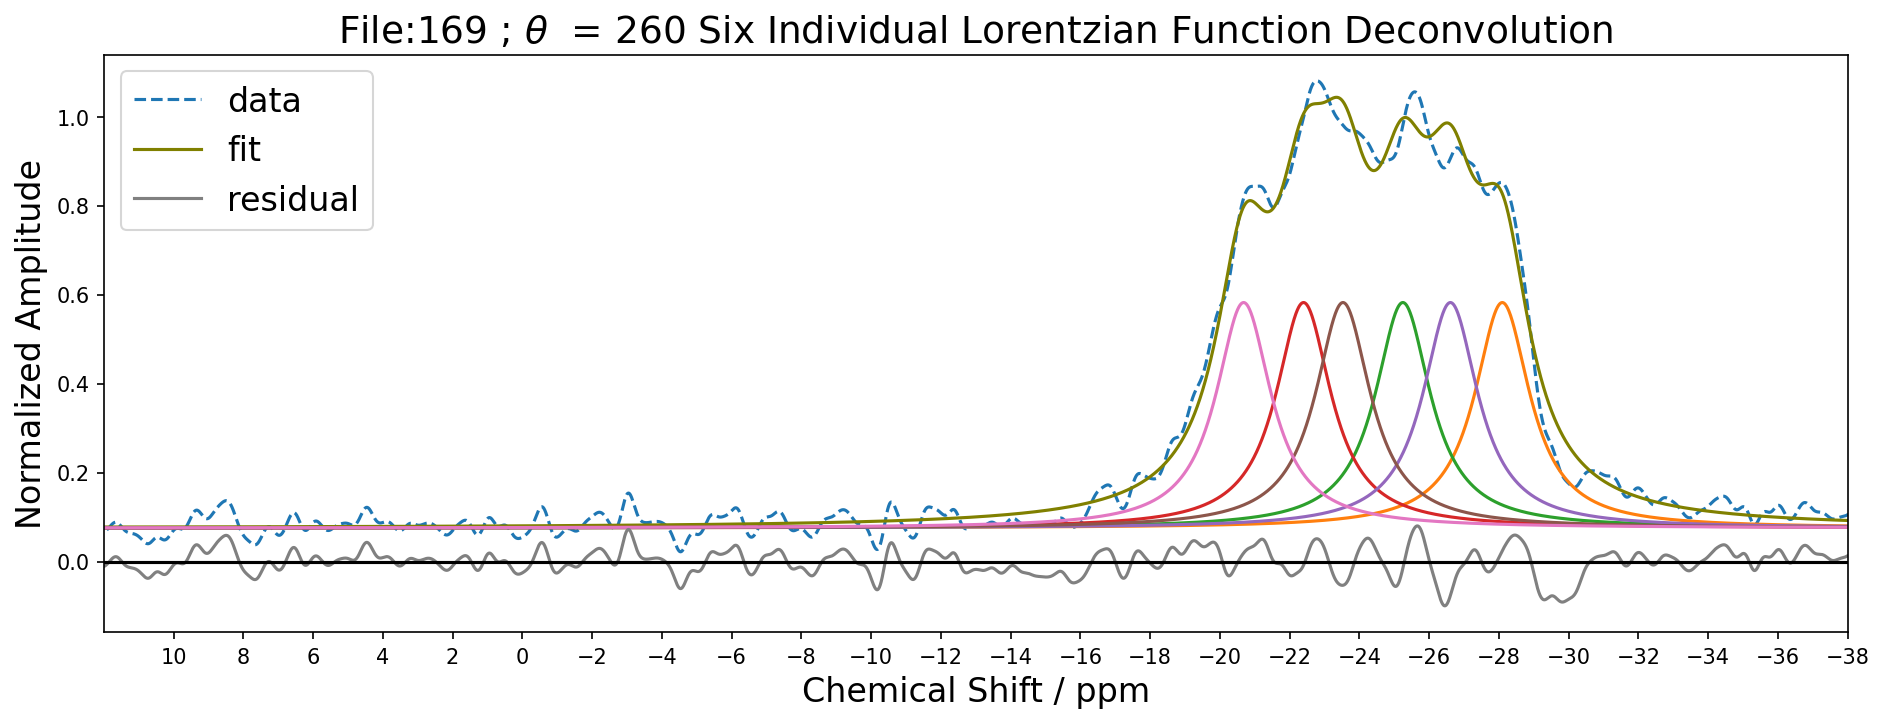

Results for data file SW_Shiva169.txt:
gamma = 1.703709790754975
center_1 = -28.09275806925068
center_2 = -25.241545681806546
center_3 = -22.3943502003847
center_4 = -26.605129143945938
center_5 = -23.524773844586278
center_6 = -20.67600572524859
A = 0.8633610526940678
offset = 0.07532266327452752


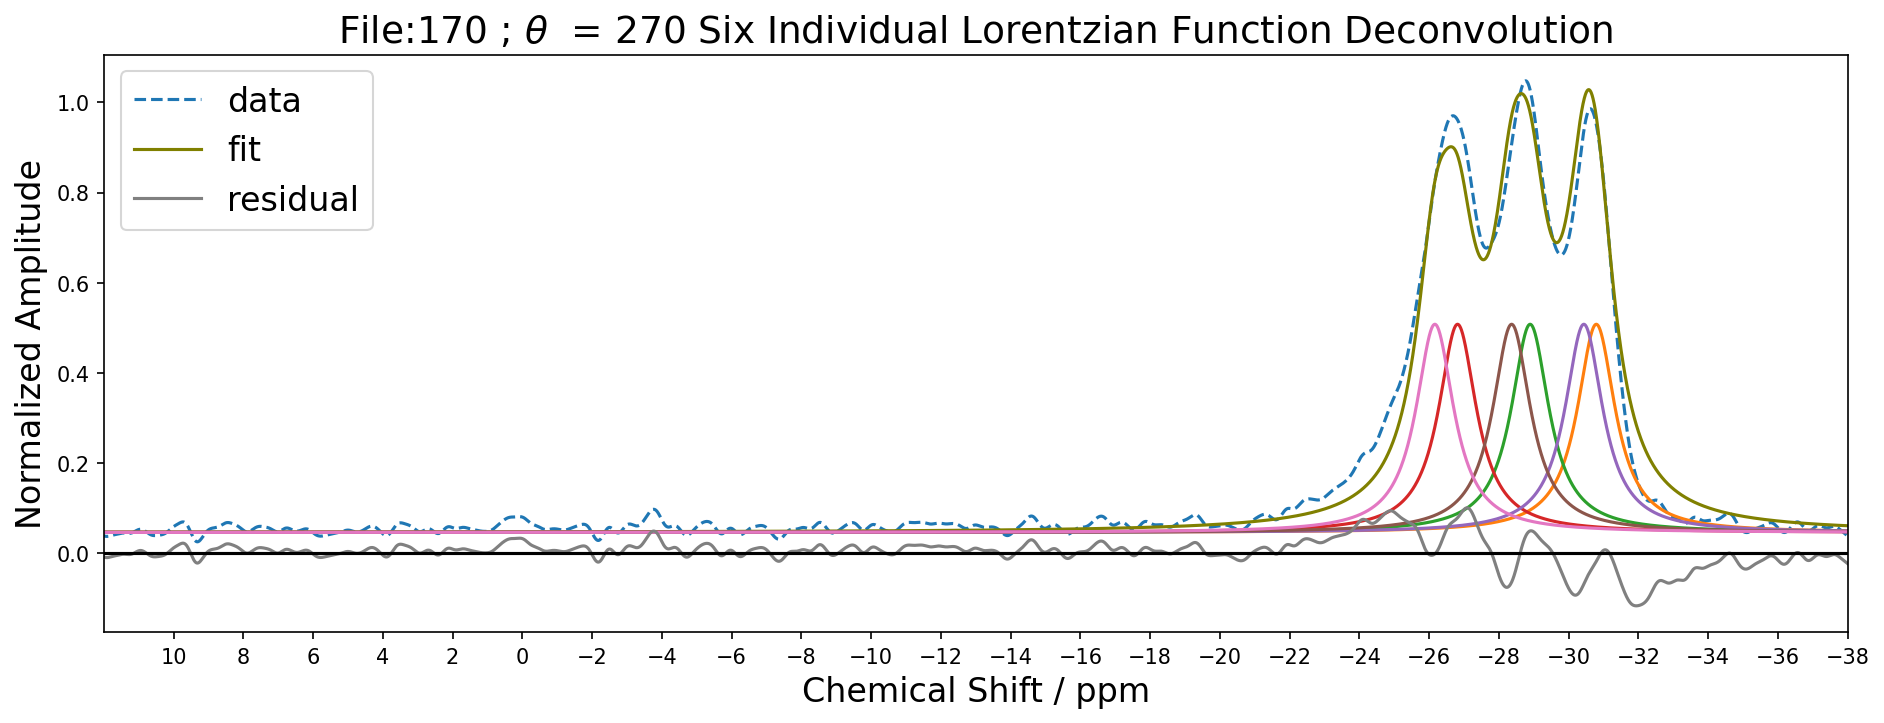

Results for data file SW_Shiva170.txt:
gamma = 1.16945772669714
center_1 = -30.78845691000475
center_2 = -28.89192889948267
center_3 = -26.81068953447901
center_4 = -30.431846494477085
center_5 = -28.361044170596717
center_6 = -26.159869710189607
A = 0.5398554424999249
offset = 0.04627866255024001


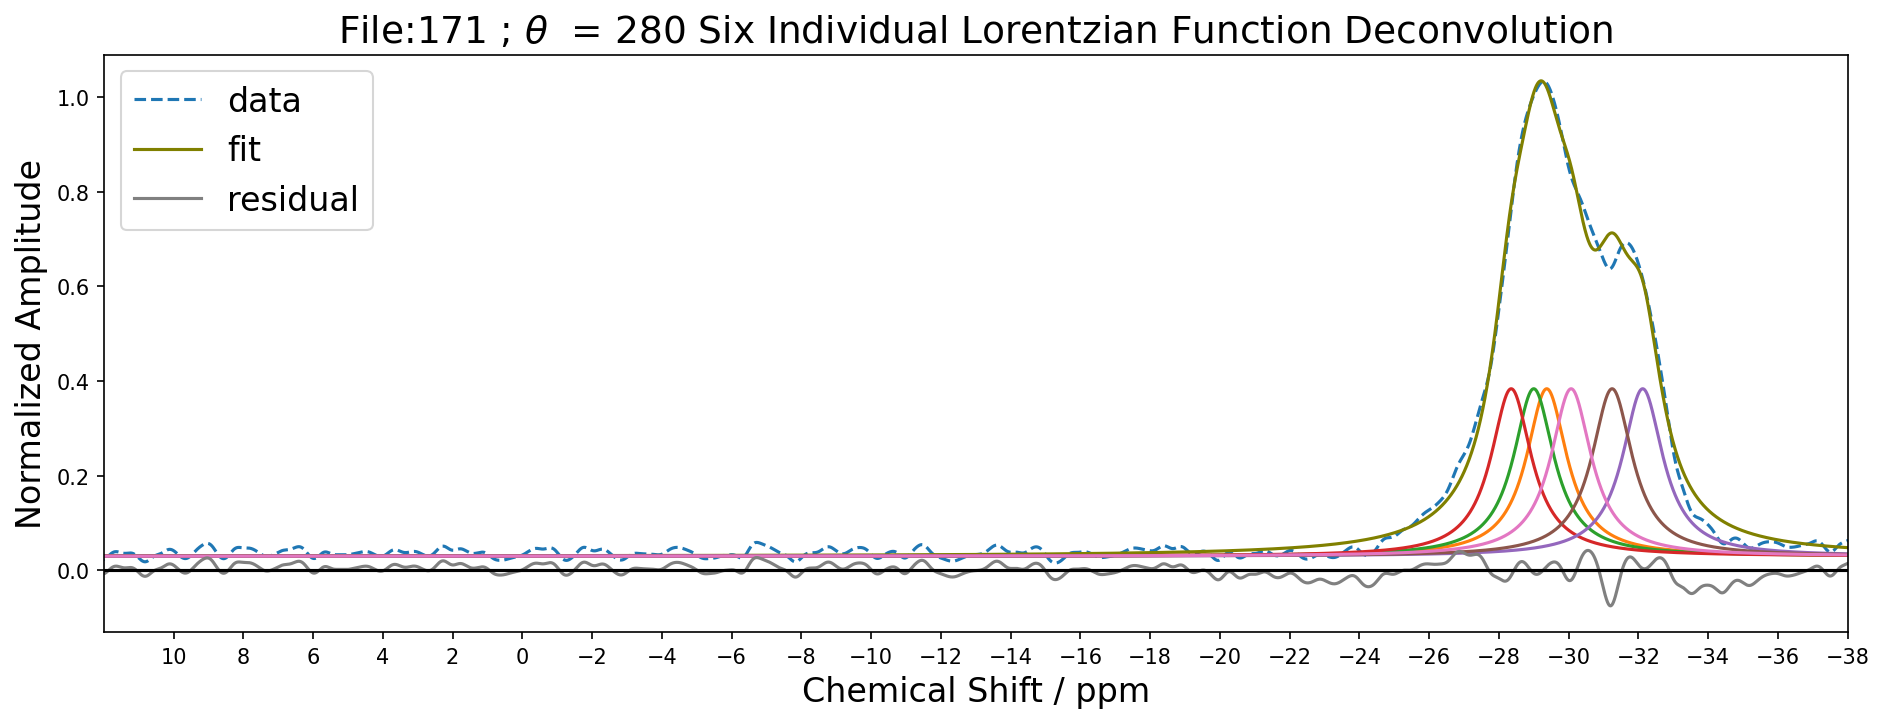

Results for data file SW_Shiva171.txt:
gamma = 1.2530151113755026
center_1 = -29.368045401082192
center_2 = -28.99494854267246
center_3 = -28.34861405107058
center_4 = -32.11914530521896
center_5 = -31.242138709274297
center_6 = -30.067385507135064
A = 0.4431478061244787
offset = 0.030016861132046862


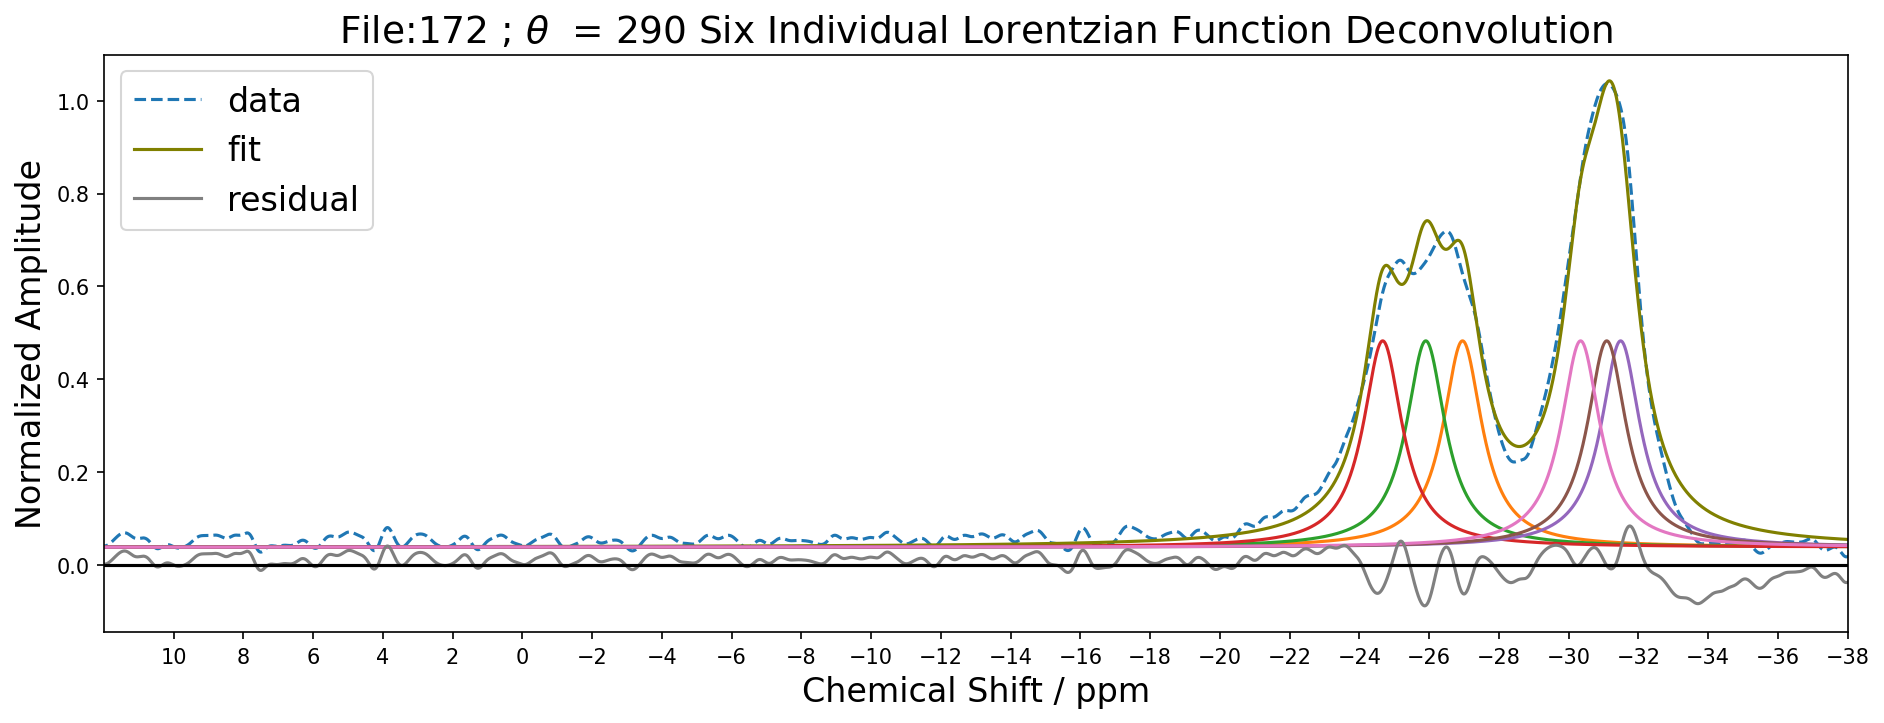

Results for data file SW_Shiva172.txt:
gamma = 1.2038889060648343
center_1 = -26.953143220215896
center_2 = -25.899718958379047
center_3 = -24.663718706477198
center_4 = -31.486599886842896
center_5 = -31.088451789684346
center_6 = -30.338700123981003
A = 0.5349622941330302
offset = 0.0384925768454791


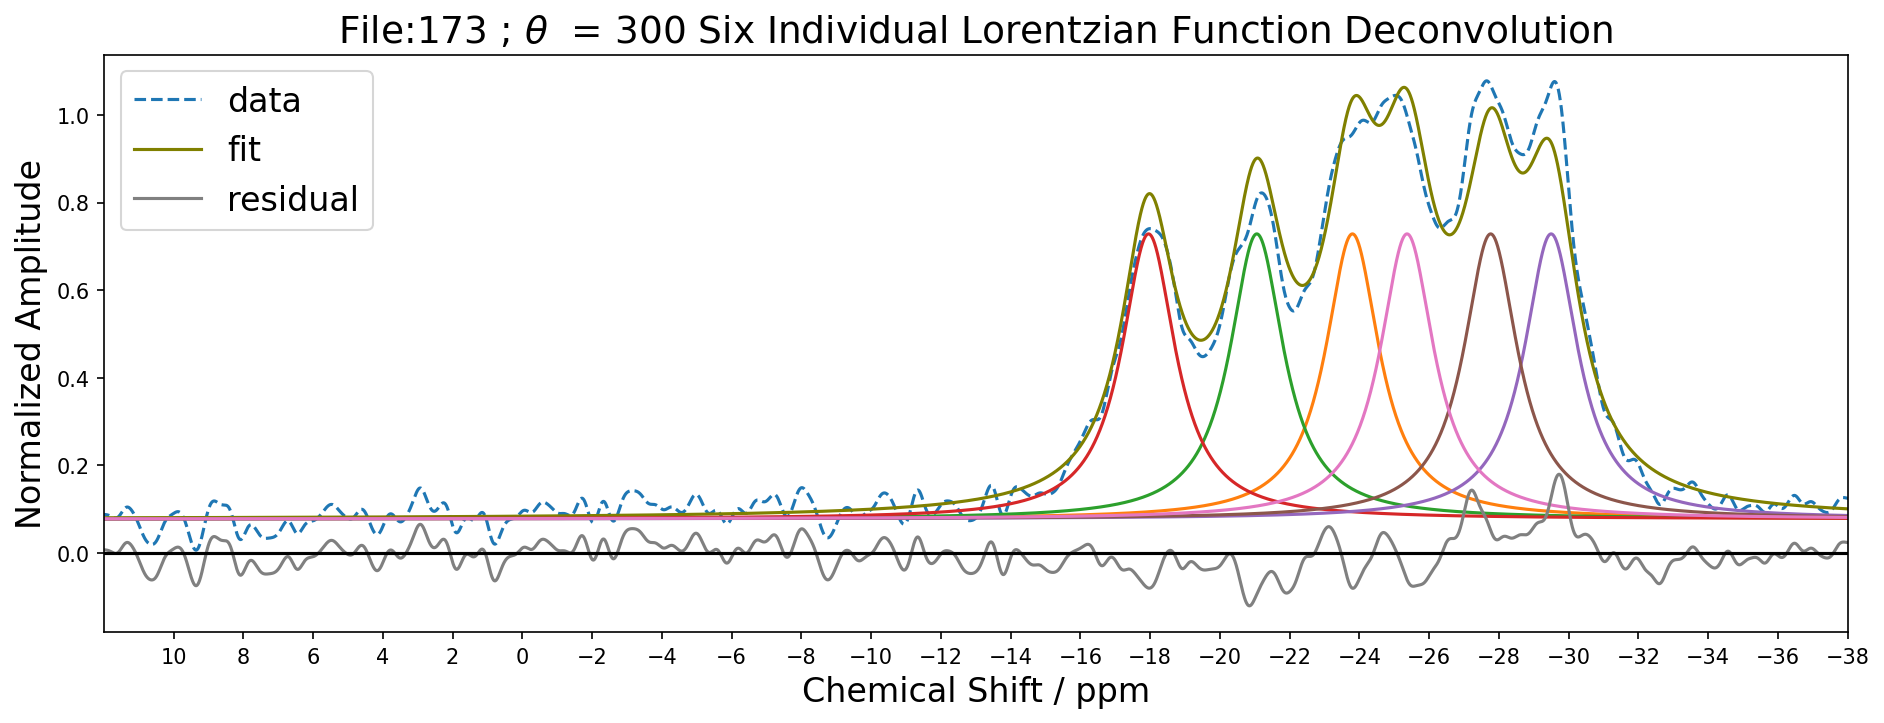

Results for data file SW_Shiva173.txt:
gamma = 1.664027890897242
center_1 = -23.795814577843956
center_2 = -21.054318820237793
center_3 = -17.94945907606131
center_4 = -29.492816321712873
center_5 = -27.75914506724537
center_6 = -25.36208143606147
A = 1.0825640292461454
offset = 0.07792359707665195


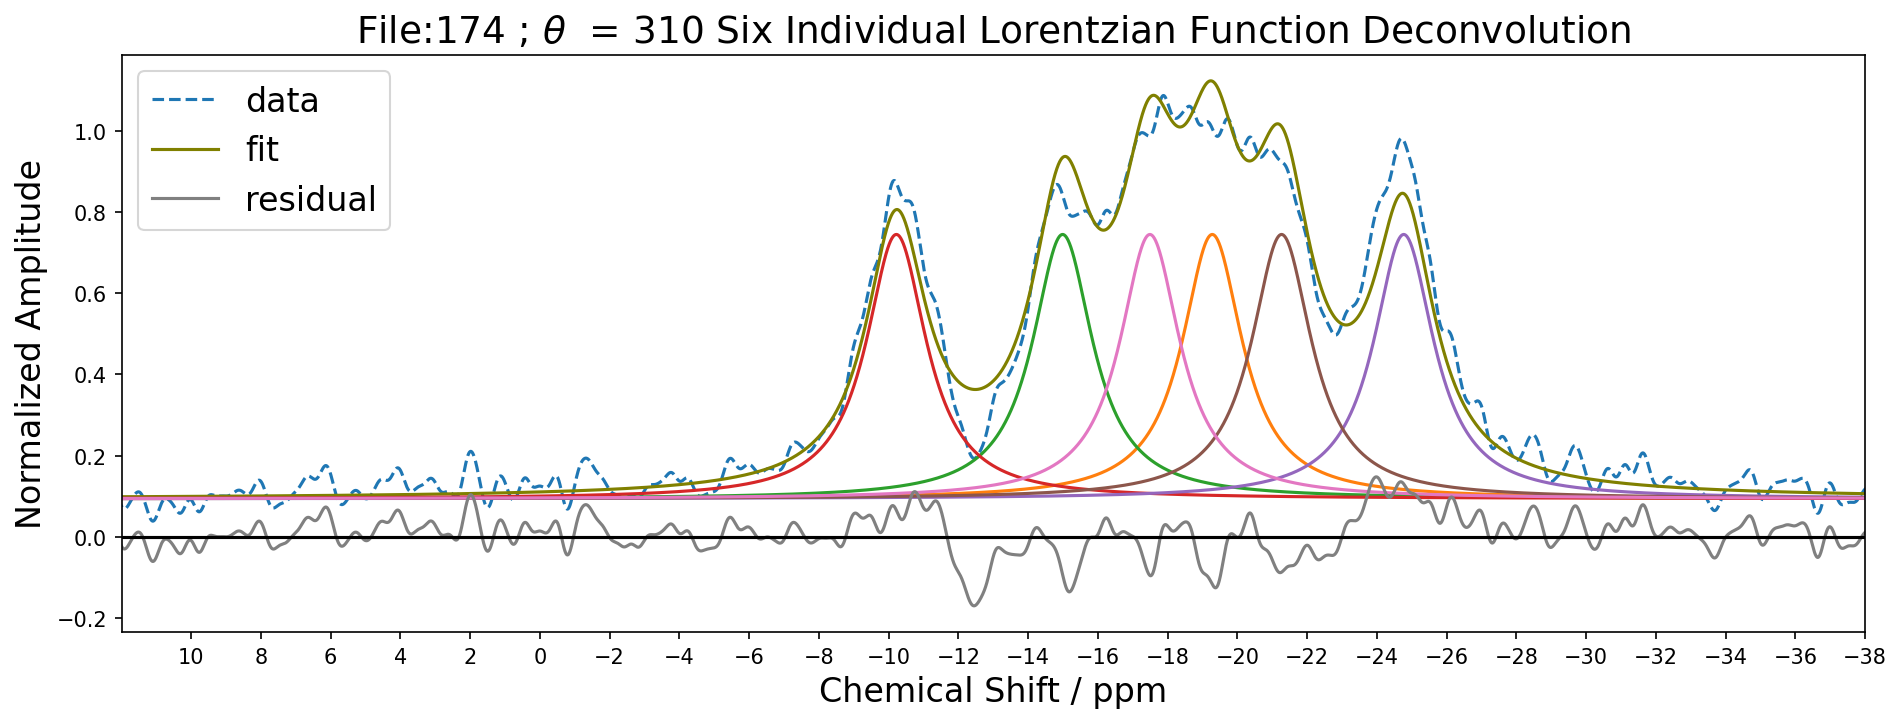

Results for data file SW_Shiva174.txt:
gamma = 1.8613039056442844
center_1 = -19.275060262165635
center_2 = -14.98387105187147
center_3 = -10.21693834616626
center_4 = -24.765325897279777
center_5 = -21.26227366987099
center_6 = -17.48734267451021
A = 1.211868025401103
offset = 0.09373397167226807


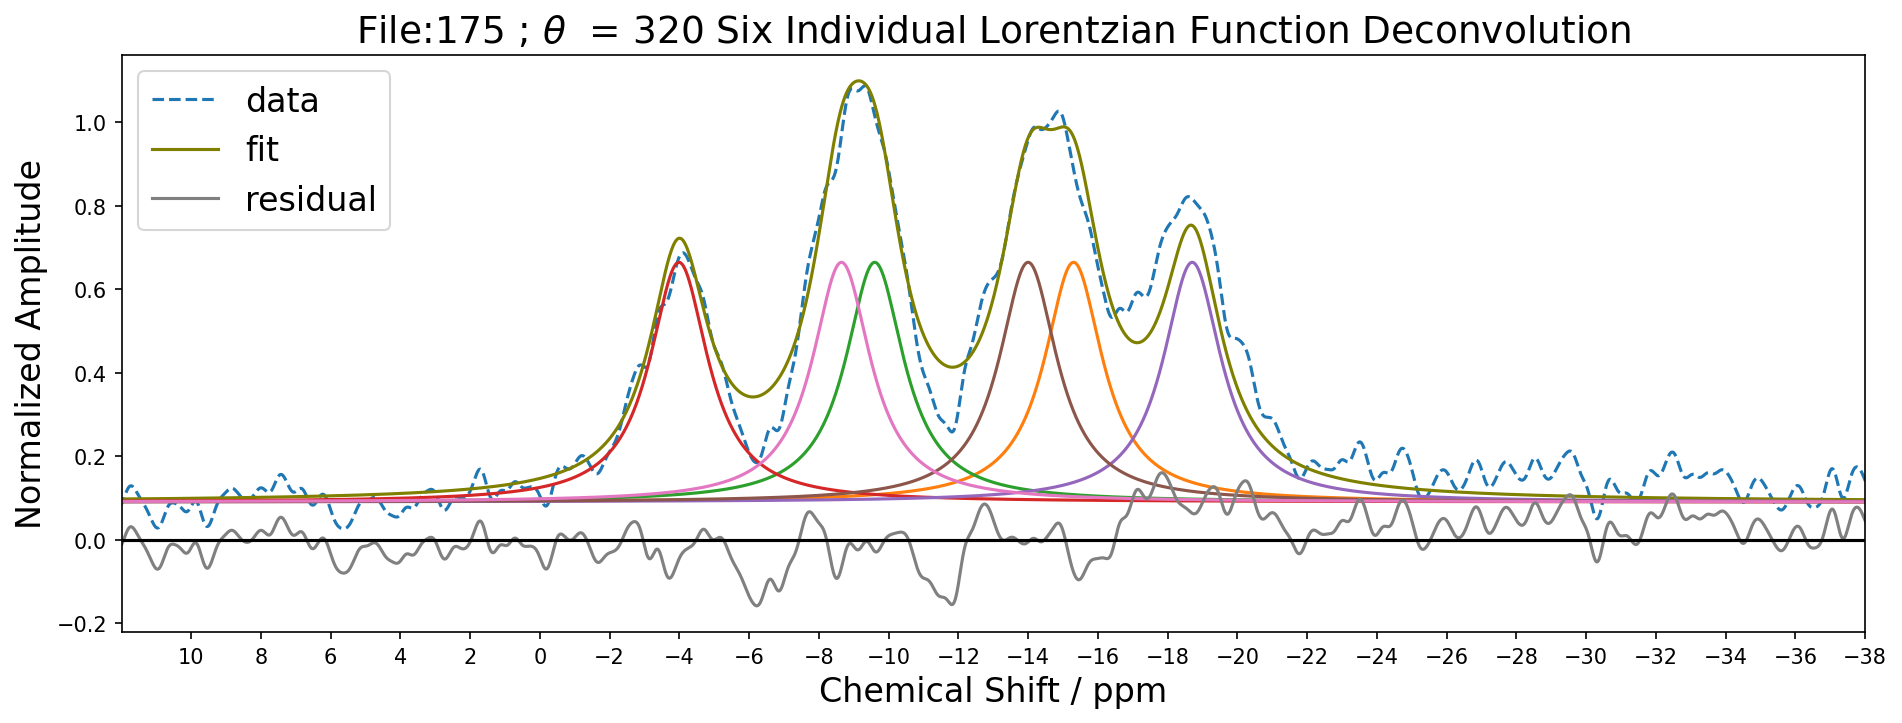

Results for data file SW_Shiva175.txt:
gamma = 1.8030484605023431
center_1 = -15.297903770779076
center_2 = -9.596701237581858
center_3 = -3.9828483049157963
center_4 = -18.699930102334907
center_5 = -13.994924117269694
center_6 = -8.643272960619317
A = 1.0349987395893339
offset = 0.09050880754227766


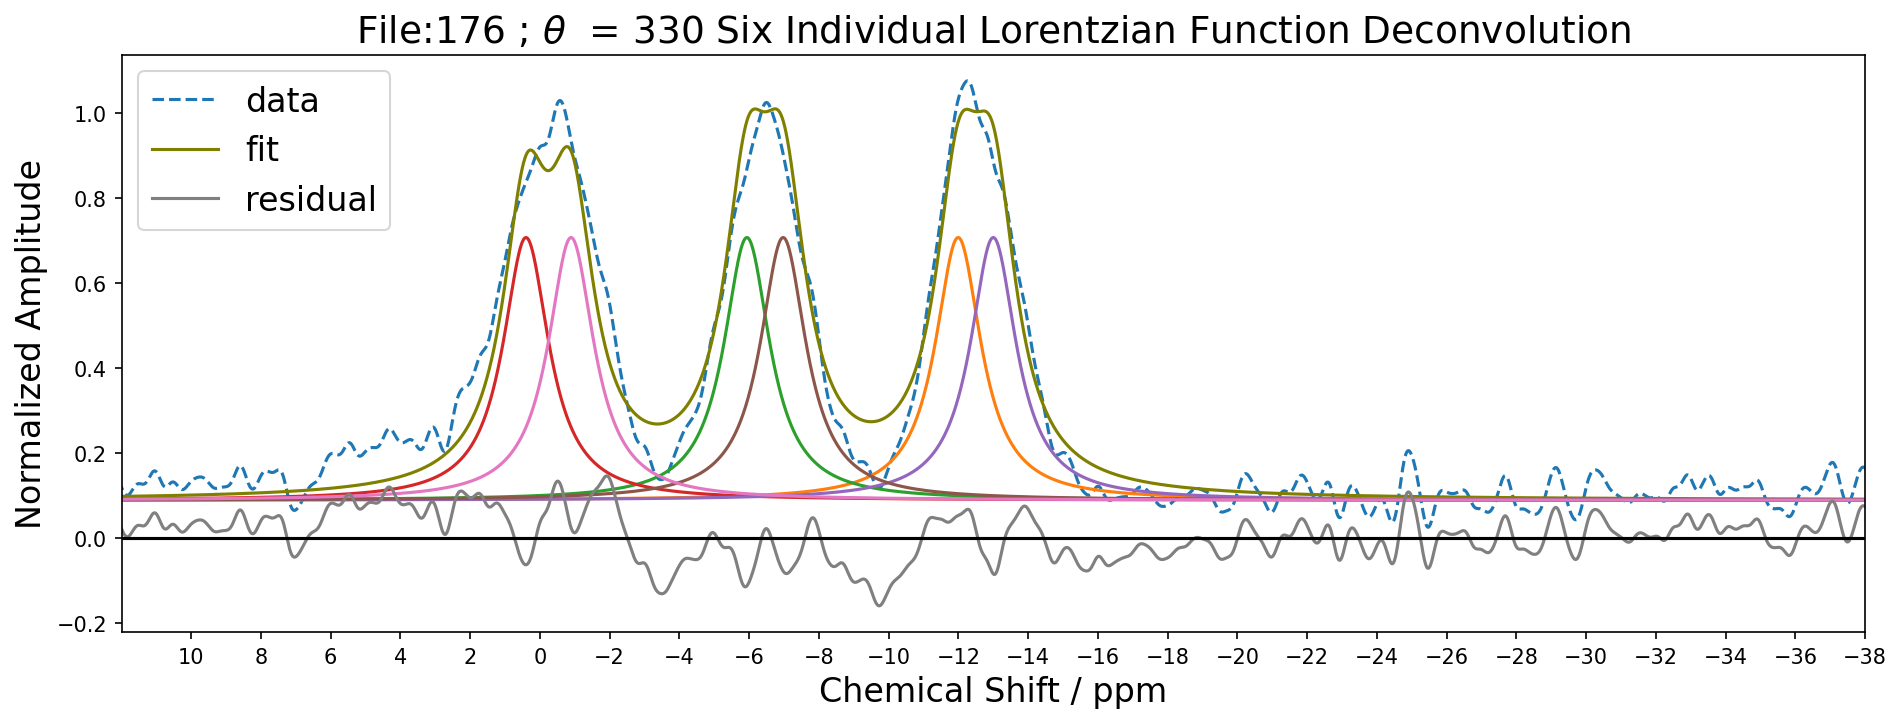

Results for data file SW_Shiva176.txt:
gamma = 1.4220537536235567
center_1 = -11.988873300045599
center_2 = -5.931516538998147
center_3 = 0.4033034958486533
center_4 = -12.995650561497891
center_5 = -6.970384765707053
center_6 = -0.8898870438444509
A = 0.8796240341536857
offset = 0.08847362600213458


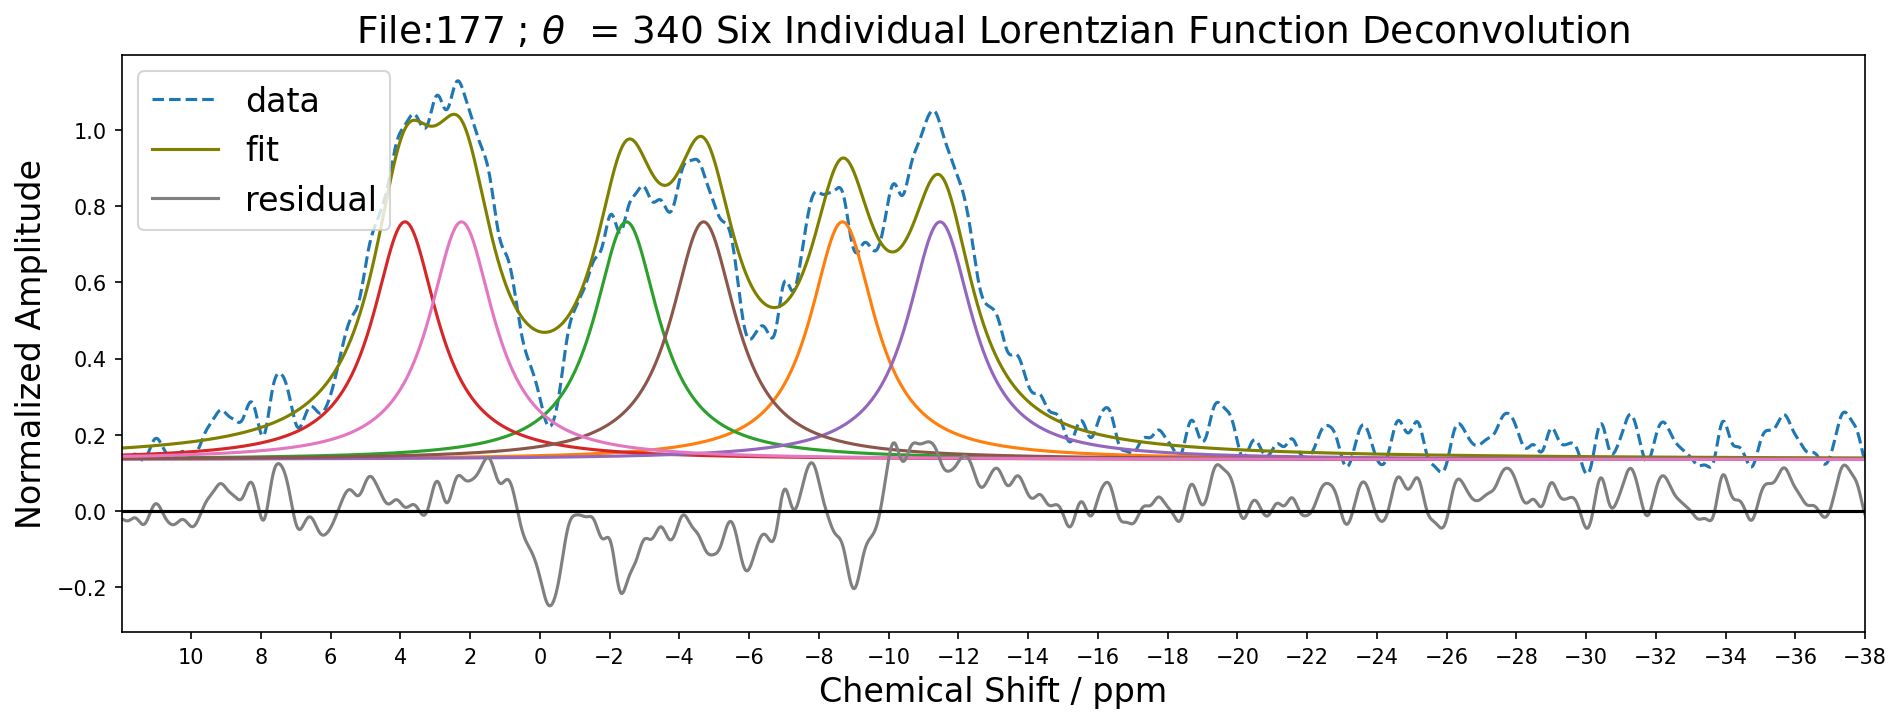

Results for data file SW_Shiva177.txt:
gamma = 2.013355273286676
center_1 = -8.671660768541658
center_2 = -2.477187153090963
center_3 = 3.872139850812813
center_4 = -11.470836855584176
center_5 = -4.689565482413511
center_6 = 2.2523245113770063
A = 1.2568535893863377
offset = 0.13452229110911412


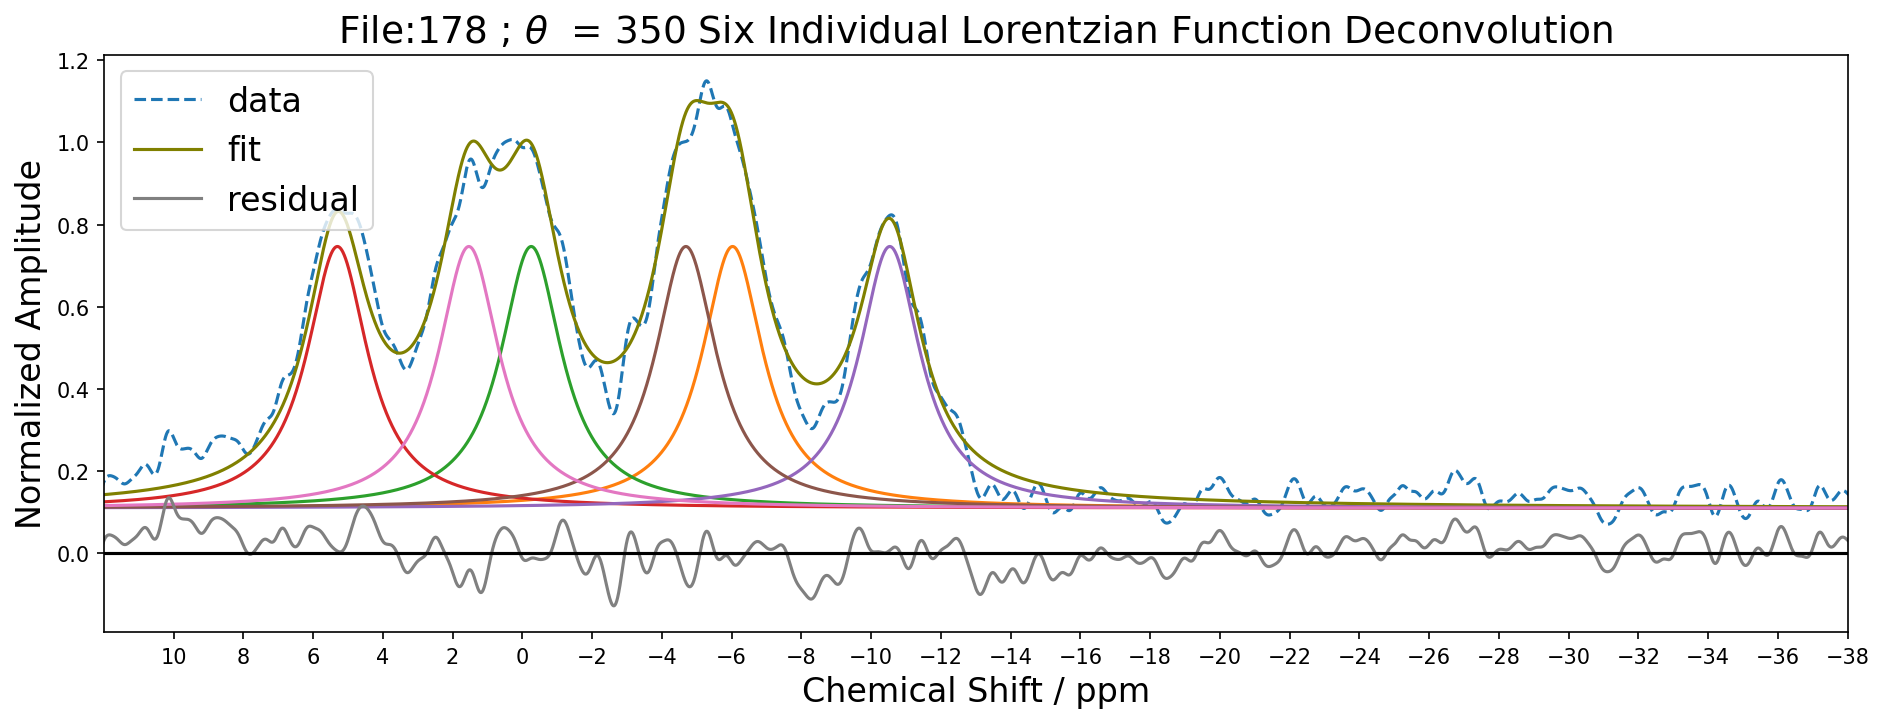

Results for data file SW_Shiva178.txt:
gamma = 1.883189291921939
center_1 = -6.022668092691273
center_2 = -0.24857434003078407
center_3 = 5.308641691866913
center_4 = -10.529835064611142
center_5 = -4.684389817262426
center_6 = 1.5400188683382392
A = 1.1996663536143535
offset = 0.10982142286955425


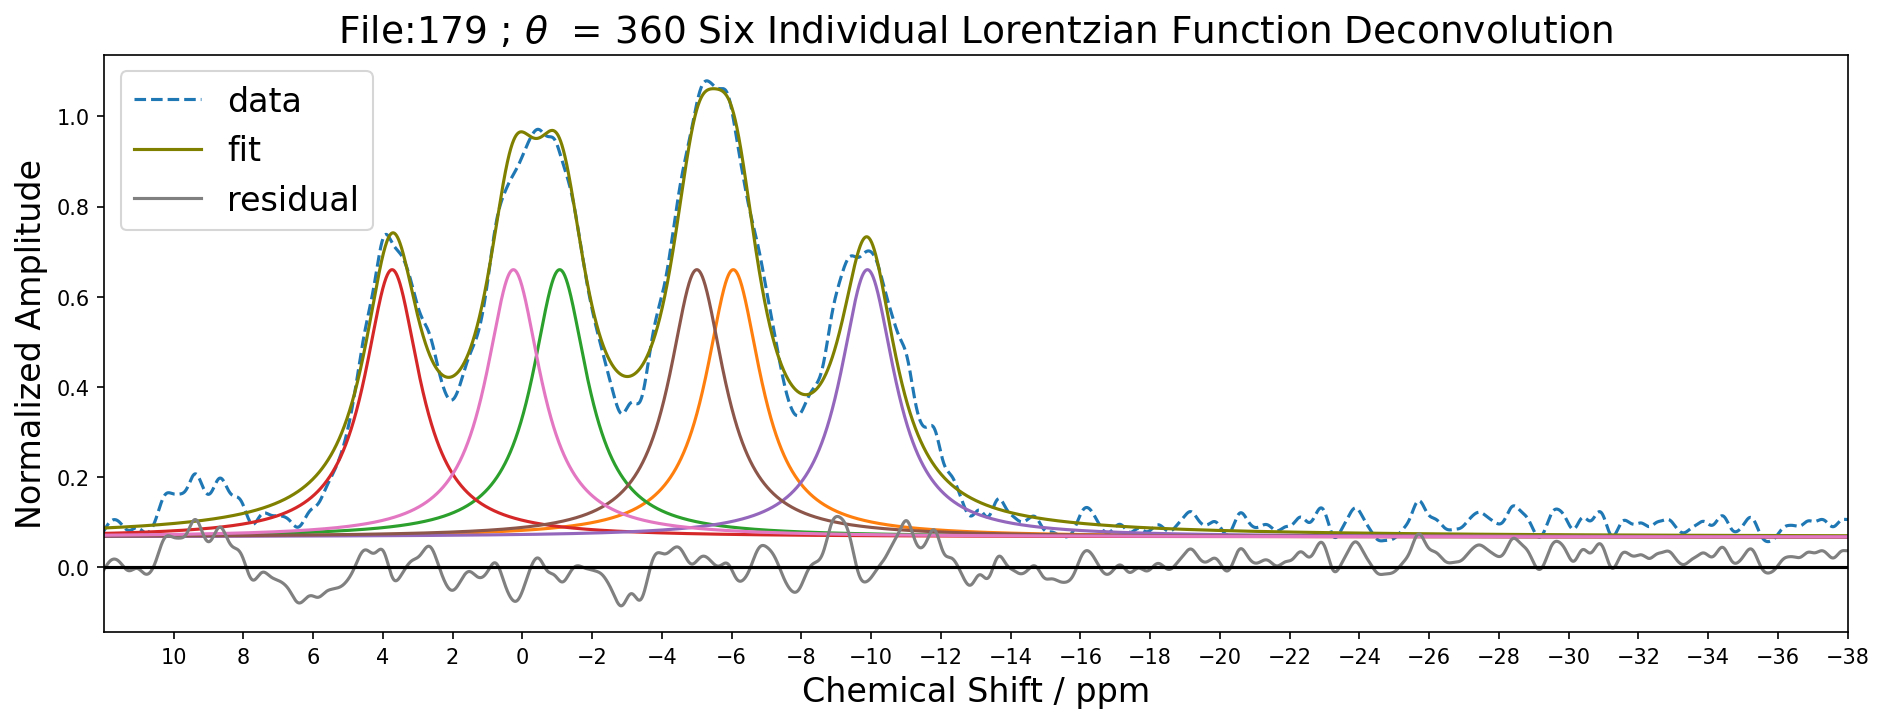

Results for data file SW_Shiva179.txt:
gamma = 1.7116579224186474
center_1 = -6.041976534677532
center_2 = -1.06475345842181
center_3 = 3.7412306849656463
center_4 = -9.890123107747689
center_5 = -4.997464369341084
center_6 = 0.2628044482714377
A = 1.0157180841203826
offset = 0.06646270988876422


In [ ]:
#Input for angle in simulation
file_start = 144                                         #enter the first file number 
file_end = 179                                                      #enter the last file number
skip_file = []

angle_start = 10
angle_end = 360
angle_step = 10

xleft = 12                                                                 # left x limit on plot
xright = -38                                                                 # right x limit on plot

timestamp = time.strftime("%Y%m%d_%H%M%S")                                    #timestamp to seperate files
out_file = f"fit_data_{str(file_start)}_{str(file_end)}_{timestamp}.csv"      #outfile name

#****************provide information of nucleus*********************************
s = 3/2         #spin of nuclei
clusters = 2    # magnetically different nuclei in unit cell
peaks = int(2*s) #peaks in one cluster

#******************************-8HQ Y rotation****************************
#****************provide initial values*****************************************
initializer_list = [ 

    {'gamma': 1, 'center_1': -0.6, 'split_1': 1, 'center_2': -4.4, 'split_2' : 1, 'A': 1, 'offset': 0.}, #144
    {'gamma': 1, 'center_1': -4, 'split_1': 1, 'center_2': -6, 'split_2': 1, 'A': 1, 'offset': 0.}, #145
    {'gamma': 1, 'center_1': -4, 'split_1': 1, 'center_2': -7, 'split_2' : 1, 'A': 1, 'offset': 0.}, #146
    {'gamma': 1, 'center_1': -6, 'split_1': 1, 'center_2': -9, 'split_2' : 1, 'A': 1, 'offset': 0.}, #147
    {'gamma': 1, 'center_1': -9, 'split_1': 3, 'center_2': -11, 'split_2' : 3, 'A': 1, 'offset': 0.}, #148
    {'gamma': 1, 'center_1': -14, 'split_1': 1, 'center_2': -14, 'split_2' : 1, 'A': 1, 'offset': 0.}, #149
    {'gamma': 1, 'center_1': -20, 'split_1': 1, 'center_2': -20, 'split_2' : 1, 'A': 1, 'offset': 0.}, #150
    {'gamma': 1, 'center_1': -24, 'split_1': 1, 'center_2': -24, 'split_2' : 1, 'A': 1, 'offset': 0.}, #151
    {'gamma': 1, 'center_1': -29, 'split_1': 1, 'center_2': -29, 'split_2' : 1, 'A': 1, 'offset': 0.}, #152
    {'gamma': 1, 'center_1': -30, 'split_1': 1, 'center_2': -30, 'split_2' : 1, 'A': 1, 'offset': 0.}, #153
    {'gamma': 1, 'center_1': -27, 'split_1': 1, 'center_2': -31, 'split_2' : 1, 'A': 1, 'offset': 0.}, #154
    {'gamma': 1, 'center_1': -22, 'split_1': 1, 'center_2': -27, 'split_2' : 1, 'A': 1, 'offset': 0.}, #155
    {'gamma': 1, 'center_1': -16, 'split_1': 5, 'center_2': -21, 'split_2' : 5, 'A': 1, 'offset': 0.}, #156
    {'gamma': 1, 'center_1': -9, 'split_1': 1, 'center_2': -14, 'split_2' : 1, 'A': 1, 'offset': 0.}, #157
    {'gamma': 1, 'center_1': -7, 'split_1': 5, 'center_2': -7, 'split_2' : 5, 'A': 2, 'offset': 0.}, #158
    {'gamma': 1, 'center_1': -3, 'split_1': 5, 'center_2': -4, 'split_2' : 5, 'A': 1, 'offset': 0.}, #159
    {'gamma': 1, 'center_1': -3, 'split_1': 1, 'center_2': -6, 'split_2' : 1, 'A': 1, 'offset': 0.}, #160
    {'gamma': 1, 'center_1': -3, 'split_1': 3, 'center_2': -8, 'split_2' : 3, 'A': 2, 'offset': 0.}, #161
    {'gamma': 1, 'center_1': -4, 'split_1': 3, 'center_2': -4, 'split_2' : 3, 'A': 2, 'offset': 0.}, #162                                                                   
    {'gamma': 1, 'center_1': -5, 'split_1': 1, 'center_2': 0.7, 'split_2': 1, 'A': 1, 'offset': 0.}, #163
    {'gamma': 1, 'center_1': -8, 'split_1': 1, 'center_2': -3, 'split_2' : 3, 'A': 1, 'offset': 0.}, # 164
    {'gamma': 1, 'center_1': -9, 'split_1': 3, 'center_2': -5, 'split_2' : 3, 'A': 1, 'offset': 0.}, #165
    {'gamma': 1, 'center_1': -11, 'split_1': 1, 'center_2': -9, 'split_2' : 1, 'A': 1, 'offset': 0.}, #166
    {'gamma': 1, 'center_1': -14, 'split_1': 3, 'center_2': -13.8, 'split_2': 3, 'A': 1, 'offset': 0.}, #167
    {'gamma': 1, 'center_1': -20, 'split_1': 3, 'center_2': -19, 'split_2' : 3, 'A': 1, 'offset': 0.}, #168
    {'gamma': 1, 'center_1': -27, 'split_1': 3, 'center_2': -22, 'split_2' : 3, 'A': 1, 'offset': 0.}, #169
    {'gamma': 1, 'center_1': -29, 'split_1': 3, 'center_2': -28, 'split_2' : 3, 'A': 1, 'offset': 0.}, #170
    {'gamma': 1, 'center_1': -29, 'split_1': 1, 'center_2': -31, 'split_2' : 1, 'A': 1, 'offset': 0.}, #171
    {'gamma': 1, 'center_1': -26, 'split_1': 1, 'center_2': -31, 'split_2' : 1, 'A': 1, 'offset': 0.}, #172
    {'gamma': 1, 'center_1': -21, 'split_1': 1.5, 'center_2': -27.5, 'split_2' : 1.5, 'A': 1, 'offset': 0.}, #173
    {'gamma': 1, 'center_1': -14, 'split_1': 2, 'center_2': -21, 'split_2' : 2, 'A': 1, 'offset': 0.}, #174
    {'gamma': 1, 'center_1': -8, 'split_1': 5, 'center_2': -14, 'split_2' : 5, 'A': 1, 'offset': 0.}, #175
    {'gamma': 1, 'center_1': -6, 'split_1': 5, 'center_2': -7, 'split_2' : 5, 'A': 1, 'offset': 0.}, #176
    {'gamma': 1, 'center_1': -4, 'split_1': 3, 'center_2': -8, 'split_2' : 3, 'A': 2, 'offset': 0.}, #177
    {'gamma': 1, 'center_1': 0, 'split_1': 3, 'center_2': -5, 'split_2' : 3, 'A': 2, 'offset': 0.},#178
    {'gamma': 1, 'center_1': -0.5, 'split_1': 5, 'center_2': -5, 'split_2' : 5, 'A': 2, 'offset': 0.}, #179
    ]


# Initialize the CSV file
with open(path + out_file, 'w', newline='') as csvfile:
    fieldnames = ['file', 'center_1', 'center_2', 'center_3', 'center_4', 'center_5', 'center_6', 'Comment']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()   
    
    encountered_angles = {}  # Dictionary to track encountered angles

    angle_counter = 1       # Initialize angle counter

    for numb, initial_values in zip(range(file_start, file_end+1), initializer_list):
        if numb in skip_file:
            continue 
        # Calculate angle based on file number
        angle = f"$\\theta$  = {angle_counter * angle_step}"

        # Check if angle has been encountered before
        if angle in encountered_angles:
            # Skip this file if the angle has been encountered before
            continue
        else:
            # Add the angle to the dictionary
            encountered_angles[angle] = numb
            angle_counter += 1  # Increment angle counter
        yData = np.loadtxt(path+"SW_Shiva"+str(numb)+".txt", unpack=True )                          # read in  
        yData = yData / max(yData)                                                                  # normalize
        yData = yData - min(yData)                                                                  # remove any vertical offset
        least_squares = LeastSquares(x, yData, 0.1, lorentz_cluster)
        m = Minuit(least_squares, **initial_values).migrad()

        residual = yData - lorentz_cluster(x, *m.values)                                            # finding residual

        m_fit_info = [f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}"]    
        

     #*****************Plotting************************************************
        triplet_1 = lorentz_multi(x, m.values['gamma'], m.values['center_1'], m.values['split_1'], m.values['A']) + m.values['offset']
        triplet_2 = lorentz_multi(x, m.values['gamma'], m.values['center_2'], m.values['split_2'], m.values['A']) + m.values['offset'] 

        least_squares_singlet = LeastSquares(x, yData, 0.1, lorentz_cluster_singlet)
        m_singlet = Minuit(least_squares_singlet, gamma = m.values['gamma'], center_1= (m.values['center_1'] -  m.values['split_1']), center_2 =  m.values['center_1'], 
                        center_3 = (m.values['center_1'] + m.values['split_1']), center_4  =  (m.values['center_2'] - m.values['split_2']),center_5 = m.values['center_2'],
                            center_6 =  (m.values['center_2'] + m.values['split_2']), A =  m.values['A'], offset =  m.values['offset']).migrad()

        residual = yData - lorentz_cluster_singlet(x, *m_singlet.values)                                         # finding residual
        row_dict = {'file': numb,'Comment': ''}                                                                  # Define row_dict inside the loop

        m_singlet_fit_info = [f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_singlet.fval:.1f} / {m_singlet.ndof:.0f} = {m_singlet.fmin.reduced_chi2:.1f}"] 
        #*****************Plotting************************************************
        
        peak_1 = lorentz(x, m_singlet.values['gamma'], m_singlet.values['center_1'],m_singlet.values['A']) + m_singlet.values['offset'] 
        peak_2 = lorentz(x, m_singlet.values['gamma'], m_singlet.values['center_2'],m_singlet.values['A']) + m_singlet.values['offset']
        peak_3 = lorentz(x, m_singlet.values['gamma'], m_singlet.values['center_3'],m_singlet.values['A']) + m_singlet.values['offset']
        peak_4 = lorentz(x, m_singlet.values['gamma'], m_singlet.values['center_4'],m_singlet.values['A']) + m_singlet.values['offset'] 
        peak_5 = lorentz(x, m_singlet.values['gamma'], m_singlet.values['center_5'],m_singlet.values['A']) + m_singlet.values['offset']
        peak_6 = lorentz(x, m_singlet.values['gamma'], m_singlet.values['center_6'],m_singlet.values['A']) + m_singlet.values['offset']          
        plt.figure(figsize=(15,5), dpi = 150)

        plt.plot(x, yData, '--', label="data")
        plt.plot(x, lorentz_cluster_singlet(x, *m_singlet.values), label="fit", color = 'olive')  
        plt.plot(x,peak_1 )
        plt.plot(x, peak_2)
        plt.plot(x, peak_3)
        plt.plot(x, peak_4)
        plt.plot(x, peak_5)
        plt.plot(x, peak_6)
        plt.xticks(np.arange(min(x), max(x)+1, 2.0)) 
        plt.title("File:"+str(numb) + " ; " + angle+ ' Six Individual Lorentzian Function Deconvolution', fontsize =18)
        plt.plot(x, residual, color = 'grey', label = "residual")
        plt.axhline(y = 0, xmin= x_start, xmax= x_end, color = 'black')                                                     #zero reference line
        plt.xlim([xleft, xright]) 
        plt.legend( loc='upper left', fontsize = 16)
        plt.xlabel("Chemical Shift / ppm", fontsize=16)
        plt.ylabel("Normalized Amplitude", fontsize=16)
        plt.show()
    #Printing results***********************************************
        print(f"Results for data file SW_Shiva{numb}.txt:")

        for key, value in zip(m_singlet.parameters, m_singlet.values):
            print(f"{key} = {value}")
        

    #******************Saving results in CSV file*********************************************
            
    # Extract the values of center parameters from m_singlet.values
        center_values = [m_singlet.values[f'center_{i}'] for i in range(1, 7)]



    # Construct the row dictionary
        row_dict = {
            'file': numb,
            'center_1': center_values[0],
            'center_2': center_values[1],
            'center_3': center_values[2],
            'center_4': center_values[3],
            'center_5': center_values[4],
            'center_6': center_values[5],
            'Comment': row_dict['Comment']  # Include the 'Comment' key as well
        }
        if np.any(np.abs(residual) > 0.1): # Comment to alert when residual is above a certain value (threshold value chosen here is arbitrary)
            row_dict['Comment'] = 'Check!!!'
        # Write row to CSV file
        writer.writerow(row_dict)